In [1]:
# High Voltage Breakdown Plotter
# By: Logan Norman
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
from scipy import interpolate
from dataprocesser import processdat

In [2]:
# Use this code to input a new entry into the data file

# d = {'Gas': 'Xe',
#      'Gap_Distance': '10mm',
#      'Pressure_Range': 'AP',
#      'Run':'1',
#      'Getter?':'no',
#      'Vacuum(mbar)':2.8e-5,
#      'p':[[.1,.2,.3,.4,.5,.6,.7,.8,.9,1]], 
#      'v':[[[2.3,2.3,2.3],[3.5,3.5,3.4],[4.3,4.5,4.5],[5.0,5.0,4.6],[5.0,5.1,5.2],[5.5,5.6,5.5],[6.0,6.2,6.2],[6.7,6.7,6.7],[7.2,7.2,7.1],[7.6,7.6,7.6]]]}

# dfa = pd.DataFrame(data=d)

# df2 = pd.read_hdf('HVBreakdowndata.h5')

# df = df2.append(dfa)

# df.sort_values(by=['Gas','Gap_Distance','Pressure_Range','Run'], inplace=True)
# df = df.reset_index(drop=True)

# df.to_hdf('HVBreakdowndata.h5', key = 'df', mode='w')

# df2

In [3]:
# Load in the HVBreakdown.h5 data file to a data frame df
df = pd.read_hdf('HVBreakdowndata.h5')

for i in df.index:
    df.loc[i,'Run']=str(df.loc[i,'Run'])

df

,Gap_Distance,Gas,Getter?,Pressure_Range,Run,Vacuum(mbar),p,v
0,0.1mm,Ar,yes,AP,1,0.000002,"[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]","[[0.18, 0.22, 0.18, 0.18, 0.2, 0.2, 0.22, 0.22..."
1,0.1mm,Ar,yes,GP,1,0.000003,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.5, 0.6, 0.6], [0.7, 0.7, 0.7], [0.7, 0.7, ..."
2,10mm,Ar,no,GP,1,0.000030,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[11.5, 11.3, 11.3], [15.5, 15.7, 15.7], [19.5..."
3,1mm,Ar,yes,AP,1,0.000004,"[0.12, 0.2, 0.3, 0.4, 0.5, 0.6, 0.71, 0.84, 0....","[[0.4, 0.4, 0.3], [0.5, 0.3, 0.5], [0.6, 0.5, ..."
4,1mm,Ar,no,GP,1,0.000001,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[1.9, 1.9, 1.9], [2.6, 2.5, 2.5], [3.1, 3.1, ..."
5,1mm,Ar,yes,GP,2,0.000009,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[2.6, 2.7, 2.6], [3.5, 3.4, 3.5], [4, 4, 4], ..."
6,1mm,Ar,yes,GP,3,0.000003,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[1.9, 1.9, 1.9], [2.4, 2.4, 2.4], [3.2, 3.0, ..."
7,5mm,Ar,no,GP,1,0.000003,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[8.2, 8.2, 8.3], [10.6, 10.5, 10.5], [13.1, 1..."
8,5mm,Ar,no,GP,2,0.000001,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[6.9, 6.9, 6.9], [9.6, 9.6, 9.5], [12.1, 12, ..."
9,10mm,ArCF4,no,AP,1,0.000007,"[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]","[[1.8, 1.8, 1.8], [2.9, 2.9, 3.1], [4.3, 3.7, ..."


In [4]:
#This code is used to send the unprocessed data through the averaging and error generating program and produce a processed data file

df2 = df

df3 = pd.DataFrame()

for index in df2.index:
    
    x1,x2,x3,x4,x5 = processdat(df2.loc[index,'p'],df2.loc[index,'v'],df2.loc[index,'Gap_Distance'],df2.loc[index,'Pressure_Range'])
    da = {'avev': [x1],'verr': [x2],'avep': [x3],'perr': [x4],'trend': [x5]}
    dfa = pd.DataFrame(data=da)
    
    df3 = df3.append(dfa, ignore_index = True)

df2['avev'] = df3['avev']
df2['verr'] = df3['verr']
df2['avep'] = df3['avep']
df2['perr'] = df3['perr']
df2['trend'] = df3['trend']

df2.to_hdf('processedHVdata.h5', key='df', mode='w')


/Users/jonesb/Documents/Work/Logan/Latest/HVBreakdown/dataprocesser.py:40: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, ya, 1)
/Users/jonesb/Documents/Work/Logan/Latest/HVBreakdown/dataprocesser.py:40: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, ya, 1)
/Users/jonesb/Documents/Work/Logan/Latest/HVBreakdown/dataprocesser.py:40: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, ya, 1)
/Users/jonesb/Documents/Work/Logan/Latest/HVBreakdown/dataprocesser.py:40: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, ya, 1)
/Users/jonesb/Documents/Work/Logan/Latest/HVBreakdown/dataprocesser.py:40: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, ya, 1)
/Users/jonesb/Documents/Work/Logan/Latest/HVBreakdown/dataprocesser.py:40: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, ya, 1)
/Users/jonesb/Documents/Work/Logan/Latest/HVBreakdown/dataprocesser.py:40: R

In [5]:
#Load in the processed data file to a data frame dfp
dfp = pd.read_hdf('processedHVdata.h5')

dfp = dfp.set_index(['Gas', 'Gap_Distance', 'Pressure_Range', 'Run']).sort_index()

dfp

Getter?  Vacuum(mbar)  \
Gas   Gap_Distance Pressure_Range Run                         
Ar    0.1mm        AP             1       yes      0.000002   
                   GP             1       yes      0.000003   
      10mm         GP             1        no      0.000030   
      1mm          AP             1       yes      0.000004   
                   GP             1        no      0.000001   
                                  2       yes      0.000009   
                                  3       yes      0.000003   
      5mm          GP             1        no      0.000003   
                                  2        no      0.000001   
ArCF4 10mm         AP             1        no      0.000007   
                   GP             1        no      0.000007   
      1mm          AP             1        no      0.000008   
                   GP             1        no      0.000008   
ArCH4 0.1mm        GP             1        no      0.000006   
      10mm         AP             1        no      0.000007   
                   GP             1        no      0.000006   
                                  2        no      0.000008   
      1mm          AP             1        no      0.000009   
                   GP             1        no      0.000008   
                                  2        no      0.000007   
                                  3        no      0.000009   
      2mm          GP             1        no      0.000007   
      5mm          GP             1        no      0.000015   
ArCO2 10mm         GP             1        no      0.000001   
      1mm          AP             1        no      0.000005   
                   GP             1        no      0.000013   
      5mm          GP             1        no      0.000007   
CF4   10mm         AP             1        no      0.000010   
                                  2        no      0.000006   
      1mm          AP             1        no      0.000007   
                   GP             1        no      0.000006   
CO2   10mm         GP             1        no      0.000005   
      1mm          AP             1        no      0.000040   
                   GP             1        no      0.000007   
Xe    10mm         AP             1        no      0.000028   
      1mm          AP             1        no      0.000052   
                   GP             1        no      0.000006   

                                                                                       p  \
Gas   Gap_Distance Pressure_Range Run                                                      
Ar    0.1mm        AP             1     [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]   
                   GP             1                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
      10mm         GP             1                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
      1mm          AP             1    [0.12, 0.2, 0.3, 0.4, 0.5, 0.6, 0.71, 0.84, 0....   
                   GP             1                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
                                  2                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
                                  3                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
      5mm          GP             1                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
                                  2                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
ArCF4 10mm         AP             1     [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]   
                   GP             1                                      [1, 2, 3, 4, 5]   
      1mm          AP             1    [0.1, 0.2, 0.33, 0.4, 0.5, 0.62, 0.7, 0.8, 0.9...   
                   GP             1                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
ArCH4 0.1mm        GP             1                      [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]   
      10mm         AP             1    [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.81, 0.91...   
                

In [6]:
#Leslie's Xenon Data, semi-approximated by eye

lep_Xe = np.arange(2, 8, .5)
ledat_Xe = np.array([19,23,25.5,29,32,35,38,41,43,47,49.5,52])


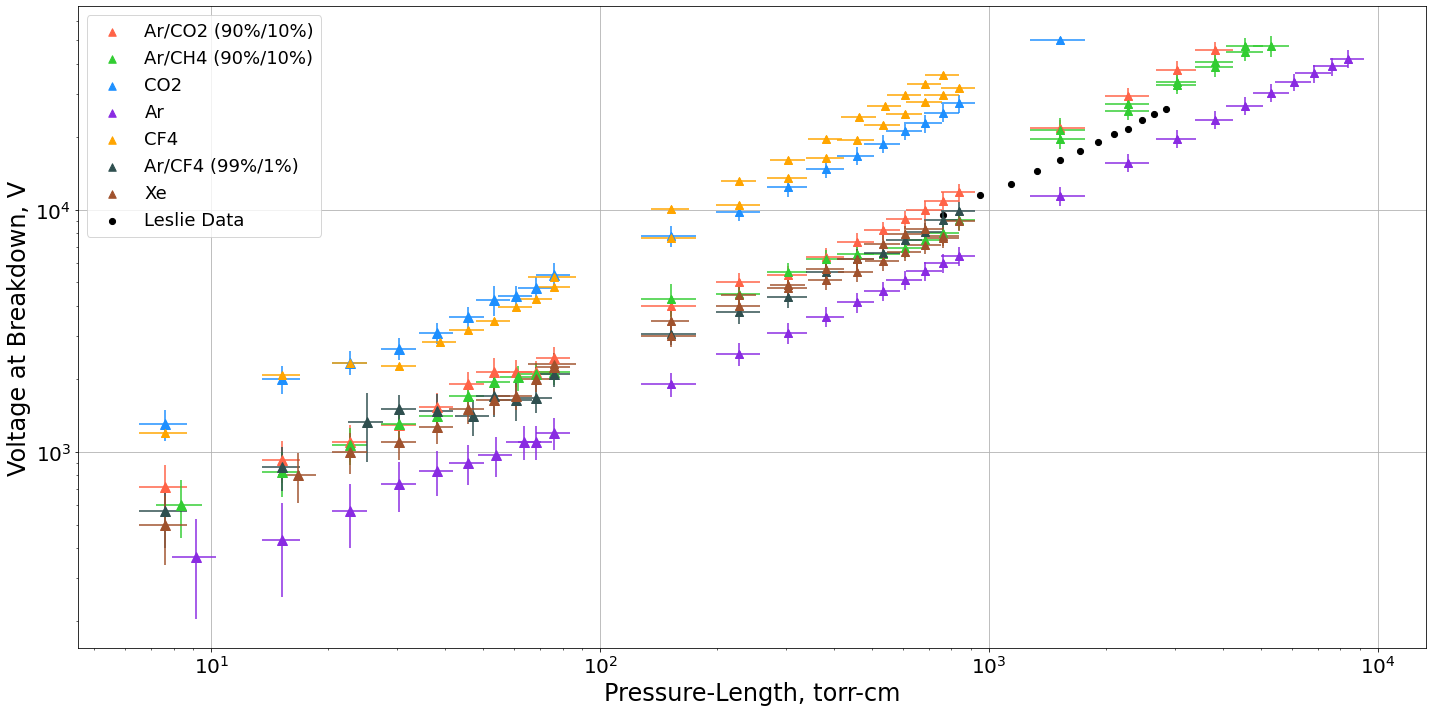

In [7]:
fig, ax = plt.subplots()

# Argon CO2
plt.errorbar(dfp.loc[('ArCO2','1mm','GP','1'), 'avep'],dfp.loc[('ArCO2','1mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCO2','1mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCO2','1mm','GP','1'), 'verr'], ls='', color='tomato', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCO2','1mm','GP','1'), 'avep'],dfp.loc[('ArCO2','1mm','GP','1'), 'avev'],color='tomato', marker='^', s=56, label='Ar/CO2 (90%/10%)')
plt.errorbar(dfp.loc[('ArCO2','1mm','AP','1'), 'avep'],dfp.loc[('ArCO2','1mm','AP','1'), 'avev'], xerr=dfp.loc[('ArCO2','1mm','AP','1'), 'perr'], yerr=dfp.loc[('ArCO2','1mm','AP','1'), 'verr'], ls='', color='tomato', marker='^', ms=10)
plt.scatter(dfp.loc[('ArCO2','1mm','AP','1'), 'avep'],dfp.loc[('ArCO2','1mm','AP','1'), 'avev'],color='tomato', marker='^', s=56)
plt.errorbar(dfp.loc[('ArCO2','10mm','GP','1'), 'avep'],dfp.loc[('ArCO2','10mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCO2','10mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCO2','10mm','GP','1'), 'verr'], ls='', color='tomato', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCO2','10mm','GP','1'), 'avep'],dfp.loc[('ArCO2','10mm','GP','1'), 'avev'],color='tomato', marker='^', s=56)
# plt.errorbar(dfp.loc[('ArCO2','5mm','GP','1'), 'avep'],dfp.loc[('ArCO2','5mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCO2','5mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCO2','5mm','GP','1'), 'verr'], ls='', color='tomato', marker='X', ms=10)
# plt.scatter(dfp.loc[('ArCO2','5mm','GP','1'), 'avep'],dfp.loc[('ArCO2','5mm','GP','1'), 'avev'],color='tomato', marker='X', s=56, label='5mm Spacing - Argon CO2')

# Argon CH4
plt.errorbar(dfp.loc[('ArCH4','1mm','GP','1'), 'avep'],dfp.loc[('ArCH4','1mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','GP','1'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCH4','1mm','GP','1'), 'avep'],dfp.loc[('ArCH4','1mm','GP','1'), 'avev'],color='limegreen', marker='^', s=56, label='Ar/CH4 (90%/10%)')
# plt.errorbar(dfp.loc[('ArCH4','1mm','GP','2'), 'avep'],dfp.loc[('ArCH4','1mm','GP','2'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','GP','2'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','GP','2'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
# plt.scatter(dfp.loc[('ArCH4','1mm','GP','2'), 'avep'],dfp.loc[('ArCH4','1mm','GP','2'), 'avev'],color='limegreen', marker='^', s=56, label='1mm Spacing - ArCH4 - 2')
# plt.errorbar(dfp.loc[('ArCH4','1mm','GP','3'), 'avep'],dfp.loc[('ArCH4','1mm','GP','3'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','GP','3'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','GP','3'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
# plt.scatter(dfp.loc[('ArCH4','1mm','GP','3'), 'avep'],dfp.loc[('ArCH4','1mm','GP','3'), 'avev'],color='limegreen', marker='^', s=56, label='1mm Spacing - ArCH4 - 3')
plt.errorbar(dfp.loc[('ArCH4','1mm','AP','1'), 'avep'],dfp.loc[('ArCH4','1mm','AP','1'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','AP','1'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','AP','1'), 'verr'], ls='', color='limegreen', marker='^', ms=10)
plt.scatter(dfp.loc[('ArCH4','1mm','AP','1'), 'avep'],dfp.loc[('ArCH4','1mm','AP','1'), 'avev'],color='limegreen', marker='^', s=56)
plt.errorbar(dfp.loc[('ArCH4','10mm','GP','1'), 'avep'],dfp.loc[('ArCH4','10mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','10mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','10mm','GP','1'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCH4','10mm','GP','1'), 'avep'],dfp.loc[('ArCH4','10mm','GP','1'), 'avev'],color='limegreen', marker='^', s=56)
plt.errorbar(dfp.loc[('ArCH4','10mm','GP','2'), 'avep'],dfp.loc[('ArCH4','10mm','GP','2'), 'avev'], xerr=dfp.loc[('ArCH4','10mm','GP','2'), 'perr'], yerr=dfp.loc[('ArCH4','10mm','GP','2'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCH4','10mm','GP','2'), 'avep'],dfp.loc[('ArCH4','10mm','GP','2'), 'avev'],color='limegreen', marker='^', s=56)
# plt.errorbar(dfp.loc[('ArCH4','5mm','GP','1'), 'avep'],dfp.loc[('ArCH4','5mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','5mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','5mm','GP','1'), 'verr'], ls='', color='limegreen', marker='X', ms=8)
# plt.scatter(dfp.loc[('ArCH4','5mm','GP','1'), 'avep'],dfp.loc[('ArCH4','5mm','GP','1'), 'avev'],color='limegreen', marker='X', s=56, label='10mm Spacing - ArCH4')

# CO2
plt.errorbar(dfp.loc[('CO2','1mm','GP','1'),'avep'],dfp.loc[('CO2','1mm','GP','1'),'avev'], xerr=dfp.loc[('CO2','1mm','GP','1'),'perr'], yerr=dfp.loc[('CO2','1mm','GP','1'),'verr'], ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(dfp.loc[('CO2','1mm','GP','1'),'avep'],dfp.loc[('CO2','1mm','GP','1'),'avev'],color='dodgerblue', marker='^', s=56, label='CO2')
plt.errorbar(dfp.loc[('CO2','1mm','AP','1'),'avep'],dfp.loc[('CO2','1mm','AP','1'),'avev'], xerr=dfp.loc[('CO2','1mm','AP','1'),'perr'], yerr=dfp.loc[('CO2','1mm','AP','1'),'verr'], ls='', color='dodgerblue', marker='^', ms=10)
plt.scatter(dfp.loc[('CO2','1mm','AP','1'),'avep'],dfp.loc[('CO2','1mm','AP','1'),'avev'],color='dodgerblue', marker='^', s=56)
plt.errorbar(dfp.loc[('CO2','10mm','GP','1'),'avep'],dfp.loc[('CO2','10mm','GP','1'),'avev'], xerr=dfp.loc[('CO2','10mm','GP','1'),'perr'], yerr=dfp.loc[('CO2','10mm','GP','1'),'perr'], ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(dfp.loc[('CO2','10mm','GP','1'),'avep'],dfp.loc[('CO2','10mm','GP','1'),'avev'],color='dodgerblue', marker='^', s=56)

# Argon
plt.errorbar(dfp.loc[('Ar','1mm','GP','1'),'avep'],dfp.loc[('Ar','1mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','1mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','1mm','GP','1'),'verr'], ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(dfp.loc[('Ar','1mm','GP','1'),'avep'],dfp.loc[('Ar','1mm','GP','1'),'avev'],color='blueviolet', marker='^', s=56, label='Ar')
# plt.errorbar(dfp.loc[('Ar','1mm','GP','2'),'avep'],dfp.loc[('Ar','1mm','GP','2'),'avev'], xerr=dfp.loc[('Ar','1mm','GP','2'),'perr'], yerr=dfp.loc[('Ar','1mm','GP','2'),'verr'], ls='', color='blueviolet', marker='^', ms=8)
# plt.scatter(dfp.loc[('Ar','1mm','GP','2'),'avep'],dfp.loc[('Ar','1mm','GP','2'),'avev'],color='blueviolet', marker='^', s=56, label='1mm Spacing - Argon - 2')
# plt.errorbar(dfp.loc[('Ar','1mm','GP','3'),'avep'],dfp.loc[('Ar','1mm','GP','3'),'avev'], xerr=dfp.loc[('Ar','1mm','GP','3'),'perr'], yerr=dfp.loc[('Ar','1mm','GP','3'),'verr'], ls='', color='blueviolet', marker='^', ms=8)
# plt.scatter(dfp.loc[('Ar','1mm','GP','3'),'avep'],dfp.loc[('Ar','1mm','GP','3'),'avev'],color='blueviolet', marker='^', s=56, label='1mm Spacing - Argon - 3')
plt.errorbar(dfp.loc[('Ar','1mm','AP','1'),'avep'],dfp.loc[('Ar','1mm','AP','1'),'avev'], xerr=dfp.loc[('Ar','1mm','AP','1'),'perr'], yerr=dfp.loc[('Ar','1mm','AP','1'),'verr'], ls='', color='blueviolet', marker='^', ms=10)
plt.scatter(dfp.loc[('Ar','1mm','AP','1'),'avep'],dfp.loc[('Ar','1mm','AP','1'),'avev'],color='blueviolet', marker='^', s=56)
plt.errorbar(dfp.loc[('Ar','10mm','GP','1'),'avep'],dfp.loc[('Ar','10mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','10mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','10mm','GP','1'),'verr'], ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(dfp.loc[('Ar','10mm','GP','1'),'avep'],dfp.loc[('Ar','10mm','GP','1'),'avev'],color='blueviolet', marker='^', s=56)
# plt.errorbar(dfp.loc[('Ar','5mm','GP','1'),'avep'],dfp.loc[('Ar','5mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','5mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','5mm','GP','1'),'verr'], ls='', color='blueviolet', marker='X', ms=10)
# plt.scatter(dfp.loc[('Ar','5mm','GP','1'),'avep'],dfp.loc[('Ar','5mm','GP','1'),'avev'],color='blueviolet', marker='X', s=56)
# plt.errorbar(dfp.loc[('Ar','5mm','GP','2'),'avep'],dfp.loc[('Ar','5mm','GP','2'),'avev'], xerr=dfp.loc[('Ar','5mm','GP','2'),'perr'], yerr=dfp.loc[('Ar','5mm','GP','2'),'verr'], ls='', color='blueviolet', marker='X', ms=10)
# plt.scatter(dfp.loc[('Ar','5mm','GP','2'),'avep'],dfp.loc[('Ar','5mm','GP','2'),'avev'],color='blueviolet', marker='X', s=56)

# CF4
plt.errorbar(dfp.loc[('CF4','10mm','AP','1'),'avep'],dfp.loc[('CF4','10mm','AP','1'),'avev'], xerr=dfp.loc[('CF4','10mm','AP','1'),'perr'], yerr=dfp.loc[('CF4','10mm','AP','1'),'perr'], ls='', color='orange', marker='^', ms=8)
plt.scatter(dfp.loc[('CF4','10mm','AP','1'),'avep'],dfp.loc[('CF4','10mm','AP','1'),'avev'],color='orange', marker='^', s=56, label='CF4')
plt.errorbar(dfp.loc[('CF4','1mm','GP','1'),'avep'],dfp.loc[('CF4','1mm','GP','1'),'avev'], xerr=dfp.loc[('CF4','1mm','GP','1'),'perr'], yerr=dfp.loc[('CF4','1mm','GP','1'),'perr'], ls='', color='orange', marker='^', ms=8)
plt.scatter(dfp.loc[('CF4','1mm','GP','1'),'avep'],dfp.loc[('CF4','1mm','GP','1'),'avev'],color='orange', marker='^', s=56)
plt.errorbar(dfp.loc[('CF4','1mm','AP','1'),'avep'],dfp.loc[('CF4','1mm','AP','1'),'avev'], xerr=dfp.loc[('CF4','1mm','AP','1'),'perr'], yerr=dfp.loc[('CF4','1mm','AP','1'),'perr'], ls='', color='orange', marker='^', ms=8)
plt.scatter(dfp.loc[('CF4','1mm','AP','1'),'avep'],dfp.loc[('CF4','1mm','AP','1'),'avev'],color='orange', marker='^', s=56)

# ArCF4
plt.errorbar(dfp.loc[('ArCF4','1mm','GP','1'),'avep'],dfp.loc[('ArCF4','1mm','GP','1'),'avev'], xerr=dfp.loc[('ArCF4','1mm','GP','1'),'perr'], yerr=dfp.loc[('ArCF4','1mm','GP','1'),'verr'], ls='', color='darkslategrey', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCF4','1mm','GP','1'),'avep'],dfp.loc[('ArCF4','1mm','GP','1'),'avev'],color='darkslategrey', marker='^', s=56, label='Ar/CF4 (99%/1%)')
plt.errorbar(dfp.loc[('ArCF4','1mm','AP','1'),'avep'],dfp.loc[('ArCF4','1mm','AP','1'),'avev'], xerr=dfp.loc[('ArCF4','1mm','AP','1'),'perr'], yerr=dfp.loc[('ArCF4','1mm','AP','1'),'verr'], ls='', color='darkslategrey', marker='^', ms=10)
plt.scatter(dfp.loc[('ArCF4','1mm','AP','1'),'avep'],dfp.loc[('ArCF4','1mm','AP','1'),'avev'],color='darkslategrey', marker='^', s=56)

# Xe
plt.errorbar(dfp.loc[('Xe','1mm','GP','1'),'avep'],dfp.loc[('Xe','1mm','GP','1'),'avev'], xerr=dfp.loc[('Xe','1mm','GP','1'),'perr'], yerr=dfp.loc[('Xe','1mm','GP','1'),'verr'], ls='', color='sienna', marker='^', ms=8)
plt.scatter(dfp.loc[('Xe','1mm','GP','1'),'avep'],dfp.loc[('Xe','1mm','GP','1'),'avev'],color='sienna', marker='^', s=56, label='Xe')
plt.errorbar(dfp.loc[('Xe','1mm','AP','1'),'avep'],dfp.loc[('Xe','1mm','AP','1'),'avev'], xerr=dfp.loc[('Xe','1mm','AP','1'),'perr'], yerr=dfp.loc[('Xe','1mm','AP','1'),'verr'], ls='', color='sienna', marker='^', ms=10)
plt.scatter(dfp.loc[('Xe','1mm','AP','1'),'avep'],dfp.loc[('Xe','1mm','AP','1'),'avev'],color='sienna', marker='^', s=56)
plt.errorbar(dfp.loc[('Xe','10mm','AP','1'),'avep'],dfp.loc[('Xe','10mm','AP','1'),'avev'], xerr=dfp.loc[('Xe','10mm','AP','1'),'perr'], yerr=dfp.loc[('Xe','10mm','AP','1'),'verr'], ls='', color='sienna', marker='^', ms=8)
plt.scatter(dfp.loc[('Xe','10mm','AP','1'),'avep'],dfp.loc[('Xe','10mm','AP','1'),'avev'],color='sienna', marker='^', s=56)
# plt.errorbar(dfp.loc[('Xe','10mm','GP','1'),'avep'],dfp.loc[('Xe','10mm','GP','1'),'avev'], xerr=dfp.loc[('Xe','10mm','GP','1'),'perr'], yerr=dfp.loc[('Xe','10mm','GP','1'),'verr'], ls='', color='sienna', marker='^', ms=8)
# plt.scatter(dfp.loc[('Xe','10mm','GP','1'),'avep'],dfp.loc[('Xe','10mm','GP','1'),'avev'],color='sienna', marker='^', s=56)

#Leslie Data
plt.scatter(lep_Xe*760*.5, ledat_Xe*1000*.5, marker='.', s=150, color='black', label='Leslie Data')

ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(20)

plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, loc="best")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid()

plt.tight_layout()
plt.savefig('multigasplot.png', dpi=400)

plt.show()


In [8]:
p = np.arange(.4, 1e4, .01)
d = 1
gammase = .01
# Aco = 12
# Bco = 203
Aco = 12
Bco = 180
k=.86

#OG Paschen Curve
Vb = d*p*Bco/(np.log(Aco*p*d/np.log(1+1/gammase))) 

#Meek Criterion Paschen Curve
Vb2 = d*p*Bco/(np.log(Aco*p*d/np.log(10^8))) 

#Modified Paschen Formula
Vb3 = d*p**k*Bco/(np.log(d*p*Aco/np.log(1+1/gammase))) 



In [9]:

# Data From Katherine's Paper
pd_10mil = np.array([75.819,  66.675,  56.9595, 47.625,  37.9095, 27.813,  19.05,   17.3355, 15.24,
 13.335,  11.43,    9.525,   7.62,    5.5245,  3.2385])
v_10mil = np.array([1033.33333333,  951.66666667,  856.66666667,  780.,          691.66666667,
  570.,          450.,          426.33333333,  397.33333333,  371.66666667,
  344.33333333,  316.33333333,  285.66666667,  257.33333333,  221.66666667])
pd10mil_err = np.array([7.58429284, 6.67022087, 5.69913473, 4.76630848, 3.79573341, 2.78781634,
 1.91450131, 1.74398562, 1.5358601,  1.34703842, 1.15876626, 0.97136322,
 0.78545162, 0.58437253, 0.37572473])
v10mil_err = np.array([47.14045208, 18.40893503,  4.71404521,  4.0824829,   6.23609564,  4.0824829,
  0.,          2.62466929,  1.88561808,  2.3570226,   0.47140452,  1.24721913,
  3.09120617,  1.88561808,  1.24721913])

# Data From Leslie's Paper
lep = np.arange(1, 10.5, .5)
ledat = np.array([[3.5,3.3,3.3,3.3],[4,3.8,3.8,3.9],[4.5,4.4,4.4,4.4],[4.8,5,4.9,5],[5.5,5.5,5.6,5.5],[6,6.1,6.1,6.1],[6.6,6.6,6.6,6.6],[7,7.1,7,7],[7.5,7.5,7.5,7.4],[8,8,7.9,7.9],[8.4,8.3,8.3,8.3],[8.6,8.7,8.6,8.7],[9,9,9.1,9],[9.4,9.3,9.4,9.3],[9.6,9.6,9.6,9.6],[9.9,9.9,10,9.9],[10.2,10.3,10.2,10.3],[10.5,10.5,10.5,10.5],[10.9,10.8,10.9,10.8]])
ledatm = []

for i in range(len(ledat)):
    ledatm.append(np.mean(ledat[i], axis = 0)*1000)

leerr = np.array([.0353,.0359,.024,.027,.0345,.04,.0442,.03553,.0519,.0456,.0536,.0552,.046,.0365,.0467,.0553,.0525,.0648,.0476])

print(leerr)
print(len(ledatm))
print(len(lep))

[0.0353  0.0359  0.024   0.027   0.0345  0.04    0.0442  0.03553 0.0519
 0.0456  0.0536  0.0552  0.046   0.0365  0.0467  0.0553  0.0525  0.0648
 0.0476 ]
19
19


In [124]:
def TownsendFormula(E,Aco,Bco):
    return Aco*750*np.exp(-Bco*750/E)

def PaschenFormula(pd,Aco,Bco,gam=gammase):
    return pd*Bco/(np.log(Aco*pd/np.log(1+1/gam)))

/usr/local/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:605: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:608: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Text(0.5, 1.0, 'Argon')

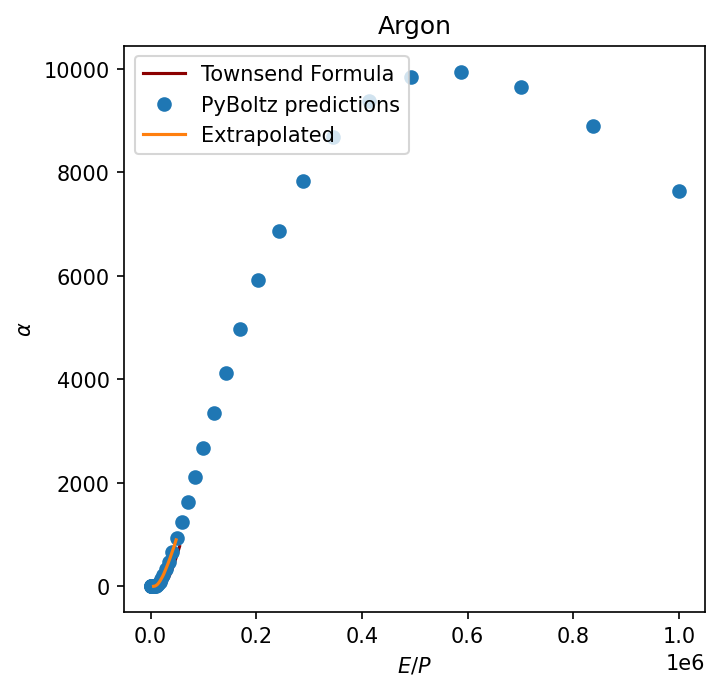

In [74]:
plt.figure(figsize=(5,5),dpi=150)
Erange=np.arange(100,55000,100)
Ar1=pd.read_csv("./PyBoltz_Ar_1bar_new.csv")


plt.plot(Erange, Aco*750*np.exp(-Bco*750/Erange),color='DarkRed',label='Townsend Formula')
alphafunc=interpolate.interp1d(Ar1.TownsendAlpha,Ar1.EField/750,bounds_error=False,fill_value='extrapolate')

plt.plot(Ar1.EField, Ar1.TownsendAlpha,'o',label='PyBoltz predictions')

alphas=np.arange(0,900,1)
plt.plot(alphafunc(alphas)*750,alphas,label='Extrapolated')

plt.xlabel(r"$E/P$")
plt.ylabel(r"$\alpha$")
plt.legend(loc='upper left')
plt.title("Argon")



In [75]:
from scipy.optimize import curve_fit

In [76]:
res=curve_fit(TownsendFormula,Ar1.EField, Ar1.TownsendAlpha,[Aco,Bco])
ACoFitPy=res[0][0]
BCoFitPy=res[0][1]

,Gas,Gap_Distance,Pressure_Range,Run,Getter?,Vacuum(mbar),p,v,avev,verr,avep,perr,trend
0,Ar,0.1mm,AP,1,yes,0.000002,"[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]","[[0.18, 0.22, 0.18, 0.18, 0.2, 0.2, 0.22, 0.22...","[202.22222222222223, 208.8888888888889, 227.77...","[154.35546117666757, 153.94494285977296, 154.8...","[0.7600000000000002, 1.5200000000000005, 2.280...","[0.10748023074035525, 0.16994116628998407, 0.2...",[1.049025119555e-312]
1,Ar,0.1mm,GP,1,yes,0.000003,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[0.5, 0.6, 0.6], [0.7, 0.7, 0.7], [0.7, 0.7, ...","[566.6666666666667, 699.9999999999999, 699.999...","[166.6109907005604, 163.56344334844508, 163.56...","[15.200000000000001, 22.800000000000004, 30.40...","[2.433187210224483, 2.9678948768445292, 3.5849...",[1.04902511954e-313]
2,Ar,10mm,GP,1,no,0.000030,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[11.5, 11.3, 11.3], [15.5, 15.7, 15.7], [19.5...","[11366.666666666668, 15633.333333333332, 19566...","[981.0004530523361, 1338.582044138083, 1667.93...","[1520.0, 2280.0, 3040.0, 3800.0, 4560.0, 5320....","[243.31872102244827, 296.7894876844529, 358.49...",[1.04902511954e-313]
3,Ar,1mm,AP,1,yes,0.000004,"[0.12, 0.2, 0.3, 0.4, 0.5, 0.6, 0.71, 0.84, 0....","[[0.4, 0.4, 0.3], [0.5, 0.3, 0.5], [0.6, 0.5, ...","[366.6666666666667, 433.33333333333337, 566.66...","[162.52760449296673, 182.93684398963728, 166.6...","[9.120000000000001, 15.200000000000001, 22.8, ...","[1.1871579507378116, 1.6994116628998404, 2.403...",[1.037751942653e-312]
4,Ar,1mm,GP,1,no,0.000001,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[1.9, 1.9, 1.9], [2.6, 2.5, 2.5], [3.1, 3.1, ...","[1899.9999999999998, 2533.333333333333, 3100.0...","[221.849047777988, 267.6849308837205, 304.0016...","[152.0, 228.0, 304.0, 380.0, 456.0, 532.0, 608...","[24.331872102244823, 29.67894876844529, 35.849...",[1.04902511954e-313]
5,Ar,1mm,GP,2,yes,0.000009,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[2.6, 2.7, 2.6], [3.5, 3.4, 3.5], [4, 4, 4], ...","[2633.3333333333335, 3466.666666666667, 4000.0...","[274.5454829754484, 334.6269896798855, 372.055...","[152.0, 228.0, 304.0, 380.0, 456.0, 532.0, 608...","[24.331872102244823, 29.67894876844529, 35.849...",[1.04902511954e-313]
6,Ar,1mm,GP,3,yes,0.000003,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[1.9, 1.9, 1.9], [2.4, 2.4, 2.4], [3.2, 3.0, ...","[1899.9999999999998, 2400.0, 3066.666666666666...","[221.849047777988, 254.35604966267266, 315.952...","[152.0, 228.0, 304.0, 380.0, 456.0, 532.0, 608...","[24.331872102244823, 29.67894876844529, 35.849...",[1.04902511954e-313]
7,Ar,5mm,GP,1,no,0.000003,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[8.2, 8.2, 8.3], [10.6, 10.5, 10.5], [13.1, 1...","[8233.333333333332, 10533.333333333334, 13000....","[716.602555271904, 907.9070559381186, 1122.508...","[760.0, 1140.0, 1520.0, 1900.0, 2280.0, 2660.0...","[121.65936051122414, 148.39474384222646, 179.2...",[1.04902511954e-313]
8,Ar,5mm,GP,2,no,0.000001,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[[6.9, 6.9, 6.9], [9.6, 9.6, 9.5], [12.1, 12, ...","[6900.000000000001, 9566.666666666666, 12033.3...","[604.9933883936255, 827.2842451190655, 1033.44...","[760.0, 1140.0, 1520.0, 1900.0, 2280.0, 2660.0...","[121.65936051122414, 148.39474384222646, 179.2...",[1.04902511954e-313]
9,ArCF4,10mm,AP,1,no,0.000007,"[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]","[[1.8, 1.8, 1.8], [2.9, 2.9, 3.1], [4.3, 3.7, ...","[1800.0, 2966.666666666667, 3966.666666666667,...","[215.7614423385235, 309.0014383281879, 445.797...","[76.0, 152.0, 228.0, 304.0, 380.0, 456.0, 532....","[10.748023074035524, 16.994116628998402, 24.03...",[1.049025119555e-312]


In [189]:
dfp2=dfp.reset_index()
psFit=np.concatenate(dfp2[dfp2.Gas=='Ar'].p.values)
ds=[float(g[:-2]) for g in dfp2[dfp2.Gas=='Ar'].Gap_Distance]


pdFit=np.concatenate(dfp2[dfp2.Gas=='Ar'].avep.values)

vFit=np.concatenate(dfp2[dfp2.Gas=='Ar'].avev.values)
verrFit=np.concatenate(dfp2[dfp2.Gas=='Ar'].verr.values)
res=curve_fit(PaschenFormula,pdFit, vFit,[Aco,Bco],sigma=verrFit)
ACoFitDat=res[0][0]
BCoFitDat=res[0][1]

res=curve_fit(PaschenFormula,pdFit, vFit,[Aco,Bco,gammase],sigma=verrFit)
ACoFitDat2=res[0][0]
BCoFitDat2=res[0][1]
gamsefit2=res[0][2]

<ipython-input-124-74f48167834a>:5: RuntimeWarning: invalid value encountered in log
  return pd*Bco/(np.log(Aco*pd/np.log(1+1/gam)))


In [186]:
gamsefit

0.020603875041066005

In [135]:
[float(g[:-2]) for g in dfp2[dfp2.Gas=='Ar'].Gap_Distance]


[0.1, 0.1, 10.0, 1.0, 1.0, 1.0, 1.0, 5.0, 5.0]

[]

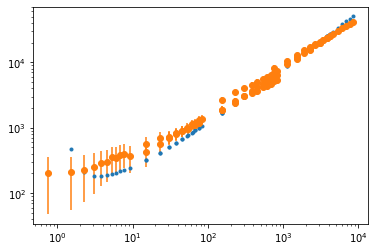

In [136]:
plt.plot(pdFit2,PaschenFormula(pdFit2,ACoFitDat,BCoFitDat,gammase),'.')
plt.errorbar(pdFit2,vFit,fmt='o',yerr=verrFit)
plt.loglog()

In [99]:
Vb4_Ar_1 = d*p*alphafunc(770/(d*p)*np.log(1+1/.0033))
Vb4_Ar_2 = d*p*alphafunc(770/(d*p)*np.log(1+1/.033))
Vb4_Ar_mid = d*p*alphafunc(770/(d*p)*np.log(1+1/.01))
Vb4_Ar_meek = d*p*alphafunc(770/(d*p)*np.log(10**8))

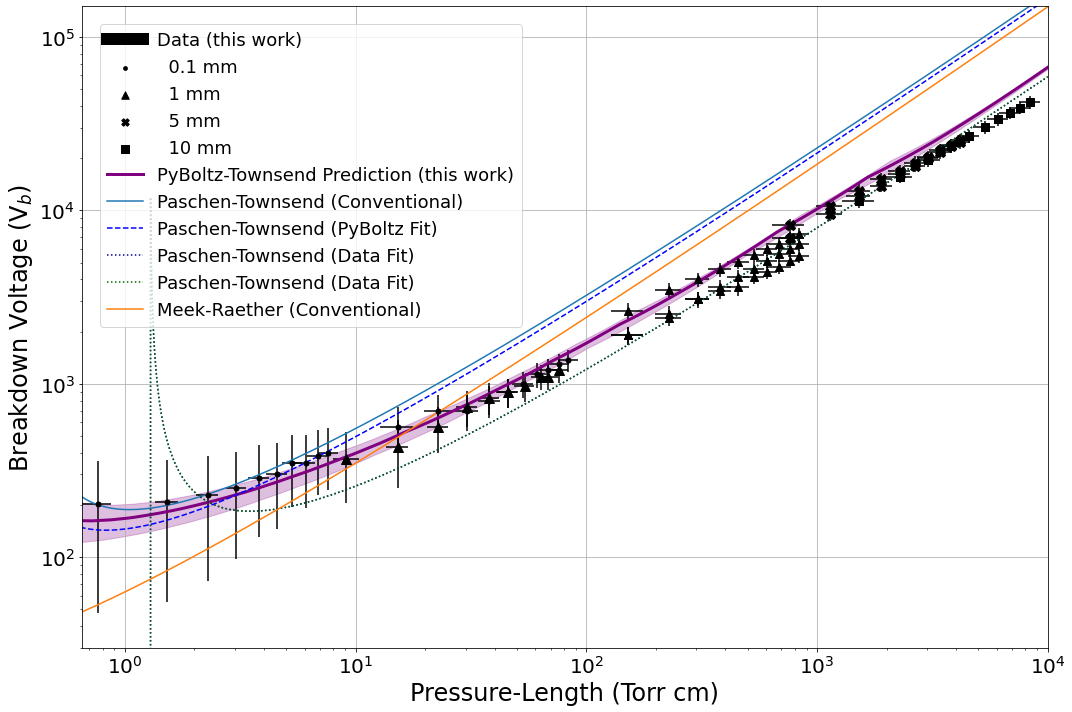

In [194]:
## Argon vs. Theoretical Curve Plotting

fig, ax = plt.subplots()

# Argon Data
lg_dattitle= plt.plot([0],[0],color='black',label='Data (this work)',markersize=1,linewidth=12)
plt.errorbar(dfp.loc[('Ar','1mm','GP','1'),'avep'],dfp.loc[('Ar','1mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','1mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','1mm','GP','1'),'verr'], ls='', color='black', marker='^', ms=8)
lg_dat1=plt.scatter(dfp.loc[('Ar','1mm','GP','1'),'avep'],dfp.loc[('Ar','1mm','GP','1'),'avev'],color='black', marker='^', s=56, label='  1 mm')
plt.errorbar(dfp.loc[('Ar','1mm','GP','2'),'avep'],dfp.loc[('Ar','1mm','GP','2'),'avev'], xerr=dfp.loc[('Ar','1mm','GP','2'),'perr'], yerr=dfp.loc[('Ar','1mm','GP','2'),'verr'], ls='', color='black', marker='^', ms=8)
plt.scatter(dfp.loc[('Ar','1mm','GP','2'),'avep'],dfp.loc[('Ar','1mm','GP','2'),'avev'],color='black', marker='^', s=56)
plt.errorbar(dfp.loc[('Ar','1mm','GP','3'),'avep'],dfp.loc[('Ar','1mm','GP','3'),'avev'], xerr=dfp.loc[('Ar','1mm','GP','3'),'perr'], yerr=dfp.loc[('Ar','1mm','GP','3'),'verr'], ls='', color='black', marker='^', ms=8)
plt.scatter(dfp.loc[('Ar','1mm','GP','3'),'avep'],dfp.loc[('Ar','1mm','GP','3'),'avev'],color='black', marker='^', s=56)
plt.errorbar(dfp.loc[('Ar','1mm','AP','1'),'avep'],dfp.loc[('Ar','1mm','AP','1'),'avev'], xerr=dfp.loc[('Ar','1mm','AP','1'),'perr'], yerr=dfp.loc[('Ar','1mm','AP','1'),'verr'], ls='', color='black', marker='^', ms=10)
plt.scatter(dfp.loc[('Ar','1mm','AP','1'),'avep'],dfp.loc[('Ar','1mm','AP','1'),'avev'],color='black', marker='^', s=56)
plt.errorbar(dfp.loc[('Ar','10mm','GP','1'),'avep'],dfp.loc[('Ar','10mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','10mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','10mm','GP','1'),'verr'], ls='', color='black', marker='s', ms=8)
lg_dat10=plt.scatter(dfp.loc[('Ar','10mm','GP','1'),'avep'],dfp.loc[('Ar','10mm','GP','1'),'avev'],color='black', marker='s', s=56, label='  10 mm')
plt.errorbar(dfp.loc[('Ar','5mm','GP','1'),'avep'],dfp.loc[('Ar','5mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','5mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','5mm','GP','1'),'verr'], ls='', color='black', marker='X', ms=10)
lg_dat5=plt.scatter(dfp.loc[('Ar','5mm','GP','1'),'avep'],dfp.loc[('Ar','5mm','GP','1'),'avev'],color='black', marker='X', s=56, label='  5 mm')
plt.errorbar(dfp.loc[('Ar','5mm','GP','2'),'avep'],dfp.loc[('Ar','5mm','GP','2'),'avev'], xerr=dfp.loc[('Ar','5mm','GP','2'),'perr'], yerr=dfp.loc[('Ar','5mm','GP','2'),'verr'], ls='', color='black', marker='X', ms=10)
plt.scatter(dfp.loc[('Ar','5mm','GP','2'),'avep'],dfp.loc[('Ar','5mm','GP','2'),'avev'],color='black', marker='X', s=56)
plt.errorbar(dfp.loc[('Ar','0.1mm','GP','1'),'avep'],dfp.loc[('Ar','0.1mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','0.1mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','0.1mm','GP','1'),'verr'], ls='', color='black', marker='.', ms=10)
lg_datp1=plt.scatter(dfp.loc[('Ar','0.1mm','GP','1'),'avep'],dfp.loc[('Ar','0.1mm','GP','1'),'avev'],color='black', marker='.', s=56, label='  0.1 mm')
plt.errorbar(dfp.loc[('Ar','0.1mm','AP','1'),'avep'],dfp.loc[('Ar','0.1mm','AP','1'),'avev'], xerr=dfp.loc[('Ar','0.1mm','AP','1'),'perr'], yerr=dfp.loc[('Ar','0.1mm','AP','1'),'verr'], ls='', color='black', marker='.', ms=10)
plt.scatter(dfp.loc[('Ar','0.1mm','AP','1'),'avep'],dfp.loc[('Ar','0.1mm','AP','1'),'avev'],color='black', marker='.', s=56)

#Katherine and Leslie Data
# plt.errorbar(pd_10mil,v_10mil, xerr=pd10mil_err, yerr=v10mil_err, ls='', marker='o', color='r')
# plt.errorbar(pd_10mil,v_10mil, ls='', marker='o', color='r', label='Katherine\'s Data')
# plt.errorbar(lep*.52*760,ledatm, xerr=.125*760, yerr=leerr*1000, ls='', marker='o', color='b')
# plt.errorbar(lep*.52*760,ledatm, ls='', marker='o', color='b', label='Leslie\'s Data')

ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

lg_pred_pyt=plt.plot(p, Vb4_Ar_mid, linewidth=3, color = 'purple',label = 'PyBoltz-Townsend Prediction (this work)')
plt.fill_between(p, Vb4_Ar_1, Vb4_Ar_2, color='purple', alpha=.25)
lg_pred_pc=plt.plot(p, PaschenFormula(p,Aco,Bco,gammase), label='Paschen-Townsend (Conventional)')
lg_pred_fitpy=plt.plot(p,PaschenFormula(p,ACoFitPy,BCoFitPy,gammase),'--',label='Paschen-Townsend (PyBoltz Fit)',color='blue')
lg_pred_fitdat=plt.plot(p,PaschenFormula(p,ACoFitDat,BCoFitDat,gammase),':',label='Paschen-Townsend (Data Fit)',color='DarkBlue')
lg_pred_fitdat2=plt.plot(p,PaschenFormula(p,ACoFitDat2,BCoFitDat2,gamsefit2),':',label='Paschen-Townsend (Data Fit)',color='DarkGreen')
# plt.plot(p, Vb4_Ar_meek, color = 'red', label='Pyboltz w/ Meek Criterion')
lg_pred_meek=plt.plot(p, Vb2, label='Meek-Raether (Conventional)')

plt.xlabel('Pressure-Length (Torr cm)', fontsize=24)
plt.ylabel('Breakdown Voltage (V$_b$)', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_ylim([30,1.5e5])
ax.set_xlim([.65,1e4])
plt.grid()


leg_order=[lg_dattitle[0],lg_datp1,lg_dat1,lg_dat5,lg_dat10,lg_pred_pyt[0],lg_pred_pc[0],lg_pred_fitpy[0],lg_pred_fitdat[0],lg_pred_fitdat2[0],lg_pred_meek[0]]
plt.legend(leg_order,[H.get_label() for H in leg_order],fontsize=18, borderaxespad=1, loc="upper left")


plt.tight_layout()

plt.savefig('Argonplot.png',dpi=400)

plt.show()



In [193]:
print("Conventional",[Aco,Bco])
print("Fit PyBoltz",[ACoFitPy,BCoFitPy])
print("Fit PyData",[ACoFitDat,BCoFitDat])
print("Fit PyData",[ACoFitDat2,BCoFitDat2])

Conventional [12, 180]
Fit PyBoltz [15.178214467669562, 173.1796171129102]
Fit PyData [3.598162330188581, 52.80625714759316]
Fit PyData [3.0426805737391676, 52.806194993558606]


/Users/jonesb/Documents/Work/Logan/Latest/HVBreakdown/dataprocesser.py:40: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x, ya, 1)


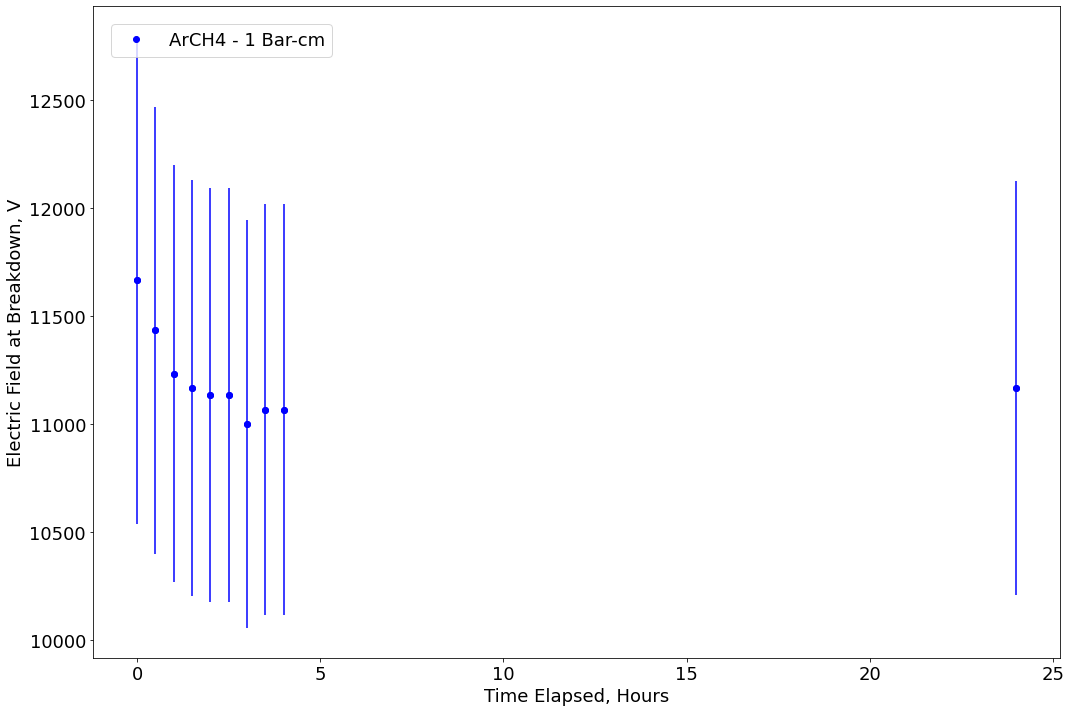

In [147]:
#Time Dependance Study
fig, ax = plt.subplots()
pt=[1,1,1,1,1,1,1,1,1,1] #Bar

t = [0,.5,1,1.5,2,2.5,3,3.5,4,24] #Hours

vt=[[12.4,11.4,11.2],[11.9,11.2,11.2],[11.2,11.3,11.2],[11.3,11.1,11.1],[11.1,11.2,11.1],[11.2,11.1,11.1],[11.0,11.0,11.0],[11.1,11.0,11.1],[11.1,11.0,11.1],[11.2,11.2,11.1]] #kiloVolts

vtave,vterr,ptave,pterr,trend = processdat(pt,vt,'10mm','AP')

plt.errorbar(t,vtave, xerr=None, yerr=vterr, ls='', marker='o', color='b')
plt.errorbar(t,vtave, ls='', marker='o', color='b', label='ArCH4 - 1 Bar-cm')

fig.set_figheight(10)
fig.set_figwidth(15)

plt.xlabel('Time Elapsed, Hours', fontsize=18)
plt.ylabel('Electric Field at Breakdown, V', fontsize=18)
plt.legend(fontsize=18, borderaxespad=1, loc="upper left")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()

plt.show()

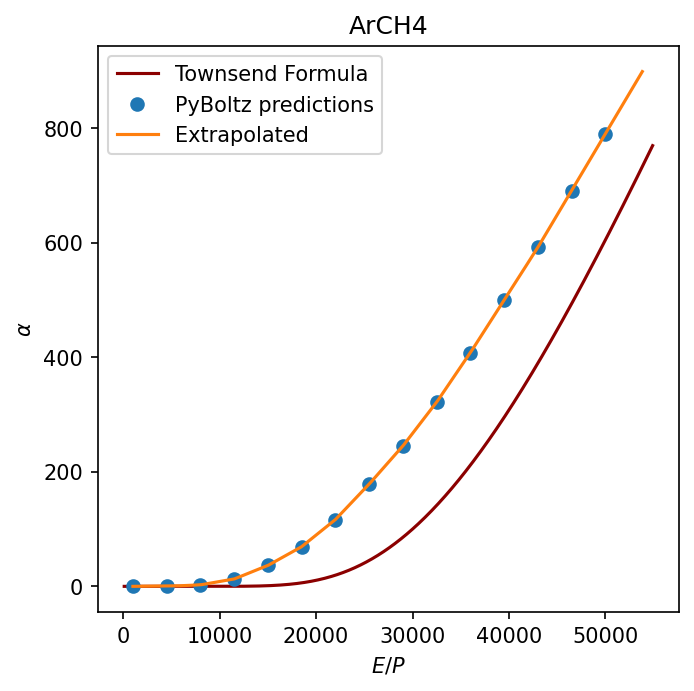

In [18]:
plt.figure(figsize=(5,5),dpi=150)
Erange=np.arange(100,55000,100)
ArCH4=pd.read_csv("./PyBoltzArCH4_1bar.csv")


plt.plot(Erange, Aco*750*np.exp(-Bco*750/Erange),color='DarkRed',label='Townsend Formula')
alphafuncCH4=interpolate.interp1d(ArCH4.TownsendAlpha,ArCH4.EField/750,bounds_error=False,fill_value='extrapolate')

plt.plot(ArCH4.EField, ArCH4.TownsendAlpha,'o',label='PyBoltz predictions')

alphas=np.arange(0,900,1)
plt.plot(alphafuncCH4(alphas)*750,alphas,label='Extrapolated')
plt.title("ArCH4")
plt.xlabel(r"$E/P$")
plt.ylabel(r"$\alpha$")
plt.legend(loc='upper left')



In [19]:
k=0.5

d=0.1
#Modified Paschen Formula
Vb3_p1 = d*p**k*Bco/(np.log(d*p*Aco/np.log(1+1/gammase))) 

d=1
#Modified Paschen Formula
Vb3_1 = d*p**k*Bco/(np.log(d*p*Aco/np.log(1+1/gammase))) 

Vb4_ArCH4_1 = d*p*alphafuncCH4(770/(d*p)*np.log(1+1/.033))
Vb4_ArCH4_2 = d*p*alphafuncCH4(770/(d*p)*np.log(1+1/.0033))
Vb4_ArCH4_mid = d*p*alphafuncCH4(770/(d*p)*np.log(1+1/.01))
Vb4_ArCH4_meek = d*p*alphafuncCH4(770/(d*p)*np.log(10**8))



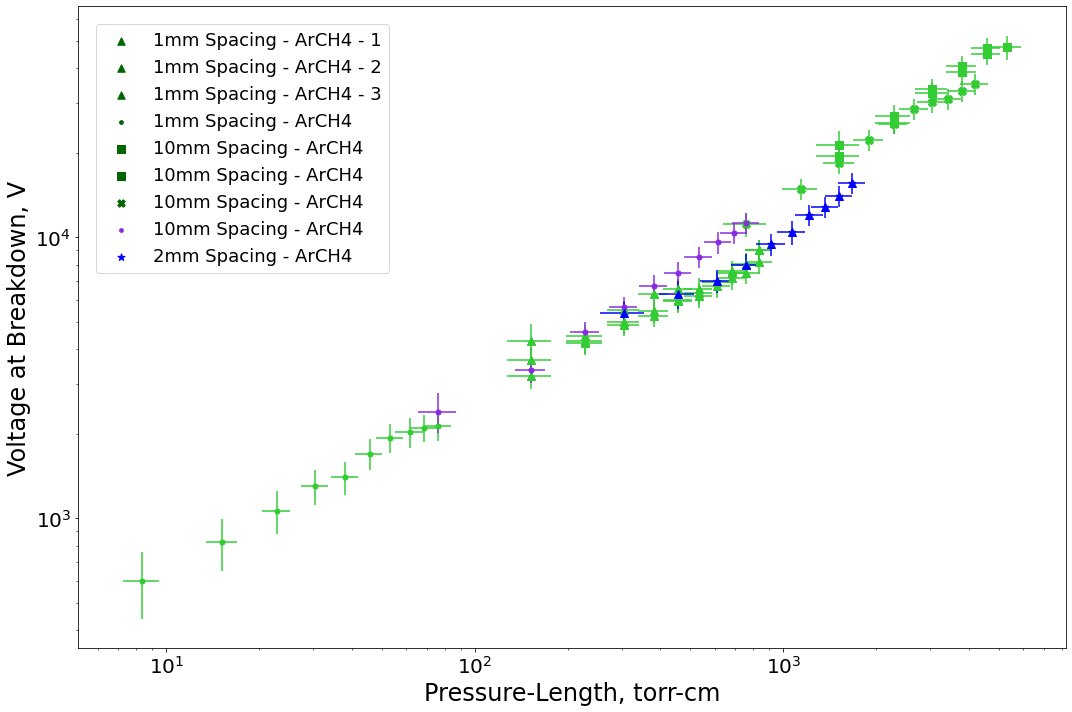

In [20]:
# Study of the nonlinear scaling of ArCH4

fig, ax = plt.subplots()

# Argon CH4
plt.errorbar(dfp.loc[('ArCH4','1mm','GP','1'), 'avep'],dfp.loc[('ArCH4','1mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','GP','1'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCH4','1mm','GP','1'), 'avep'],dfp.loc[('ArCH4','1mm','GP','1'), 'avev'],color='DarkGreen', marker='^', s=56, label='1mm Spacing - ArCH4 - 1')
plt.errorbar(dfp.loc[('ArCH4','1mm','GP','2'), 'avep'],dfp.loc[('ArCH4','1mm','GP','2'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','GP','2'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','GP','2'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCH4','1mm','GP','2'), 'avep'],dfp.loc[('ArCH4','1mm','GP','2'), 'avev'],color='DarkGreen', marker='^', s=56, label='1mm Spacing - ArCH4 - 2')
plt.errorbar(dfp.loc[('ArCH4','1mm','GP','3'), 'avep'],dfp.loc[('ArCH4','1mm','GP','3'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','GP','3'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','GP','3'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCH4','1mm','GP','3'), 'avep'],dfp.loc[('ArCH4','1mm','GP','3'), 'avev'],color='DarkGreen', marker='^', s=56, label='1mm Spacing - ArCH4 - 3')
plt.errorbar(dfp.loc[('ArCH4','1mm','AP','1'), 'avep'],dfp.loc[('ArCH4','1mm','AP','1'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','AP','1'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','AP','1'), 'verr'], ls='', color='limegreen', marker='.', ms=10)
plt.scatter(dfp.loc[('ArCH4','1mm','AP','1'), 'avep'],dfp.loc[('ArCH4','1mm','AP','1'), 'avev'],color='DarkGreen', marker='.', s=56, label='1mm Spacing - ArCH4')
plt.errorbar(dfp.loc[('ArCH4','10mm','GP','1'), 'avep'],dfp.loc[('ArCH4','10mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','10mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','10mm','GP','1'), 'verr'], ls='', color='limegreen', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCH4','10mm','GP','1'), 'avep'],dfp.loc[('ArCH4','10mm','GP','1'), 'avev'],color='DarkGreen', marker='s', s=56, label='10mm Spacing - ArCH4')
plt.errorbar(dfp.loc[('ArCH4','10mm','GP','2'), 'avep'],dfp.loc[('ArCH4','10mm','GP','2'), 'avev'], xerr=dfp.loc[('ArCH4','10mm','GP','2'), 'perr'], yerr=dfp.loc[('ArCH4','10mm','GP','2'), 'verr'], ls='', color='limegreen', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCH4','10mm','GP','2'), 'avep'],dfp.loc[('ArCH4','10mm','GP','2'), 'avev'],color='DarkGreen', marker='s', s=56, label='10mm Spacing - ArCH4')
plt.errorbar(dfp.loc[('ArCH4','5mm','GP','1'), 'avep'],dfp.loc[('ArCH4','5mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','5mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','5mm','GP','1'), 'verr'], ls='', color='limegreen', marker='X', ms=8)
plt.scatter(dfp.loc[('ArCH4','5mm','GP','1'), 'avep'],dfp.loc[('ArCH4','5mm','GP','1'), 'avev'],color='DarkGreen', marker='X', s=56, label='10mm Spacing - ArCH4')
plt.errorbar(dfp.loc[('ArCH4','10mm','AP','1'), 'avep'],dfp.loc[('ArCH4','10mm','AP','1'), 'avev'], xerr=dfp.loc[('ArCH4','10mm','AP','1'), 'perr'], yerr=dfp.loc[('ArCH4','10mm','AP','1'), 'verr'], ls='', color='blueviolet', marker='.', ms=10)
plt.scatter(dfp.loc[('ArCH4','10mm','AP','1'), 'avep'],dfp.loc[('ArCH4','10mm','AP','1'), 'avev'],color='blueviolet', marker='.', s=56, label='10mm Spacing - ArCH4')
plt.errorbar(dfp.loc[('ArCH4','2mm','GP','1'), 'avep'],dfp.loc[('ArCH4','2mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','2mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','2mm','GP','1'), 'verr'], ls='', color='blue', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCH4','2mm','GP','1'), 'avep'],dfp.loc[('ArCH4','2mm','GP','1'), 'avev'],color='blue', marker='*', s=56, label='2mm Spacing - ArCH4')


ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)

plt.legend(fontsize=18, borderaxespad=1, loc="best")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.fill_between(p, Vb4_ArCH4_1, Vb4_ArCH4_2, color='black', alpha=.25, label='PyBoltz Prediction')

# plt.plot(p, Vb4_ArCH4_mid, color='black')

# plt.plot(p, Vb4_ArCH4_meek, label='PyBoltz Meek')


#plt.ylim(1e3,2e4)
#plt.xlim(50,1.5e3)

plt.tight_layout()

plt.show()

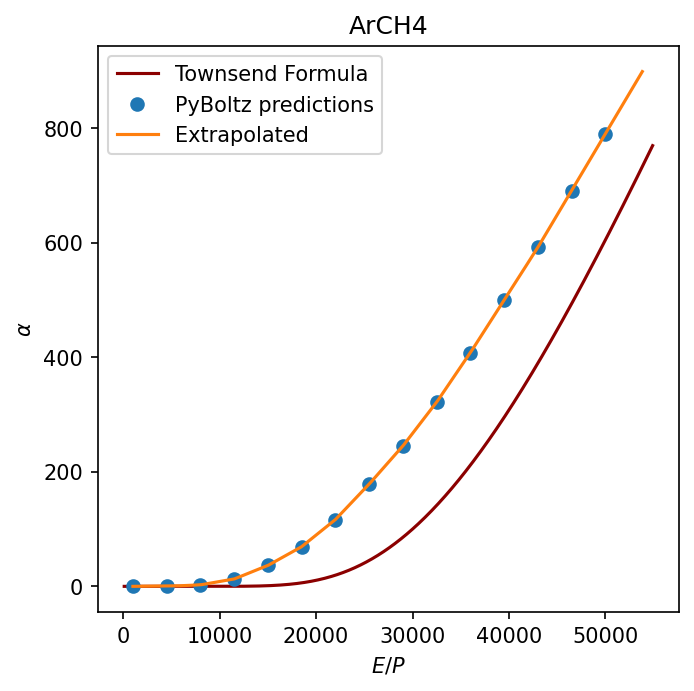

In [22]:
plt.figure(figsize=(5,5),dpi=150)
Erange=np.arange(100,55000,100)
ArCH4=pd.read_csv("./PyBoltzArCH4_1bar.csv")


plt.plot(Erange, Aco*750*np.exp(-Bco*750/Erange),color='DarkRed',label='Townsend Formula')
alphafuncCH4=interpolate.interp1d(ArCH4.TownsendAlpha,ArCH4.EField/750,bounds_error=False,fill_value='extrapolate')

plt.plot(ArCH4.EField, ArCH4.TownsendAlpha,'o',label='PyBoltz predictions')

alphas=np.arange(0,900,1)
plt.plot(alphafuncCH4(alphas)*750,alphas,label='Extrapolated')
plt.title("ArCH4")
plt.xlabel(r"$E/P$")
plt.ylabel(r"$\alpha$")
plt.legend(loc='upper left')

/usr/local/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:605: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:608: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


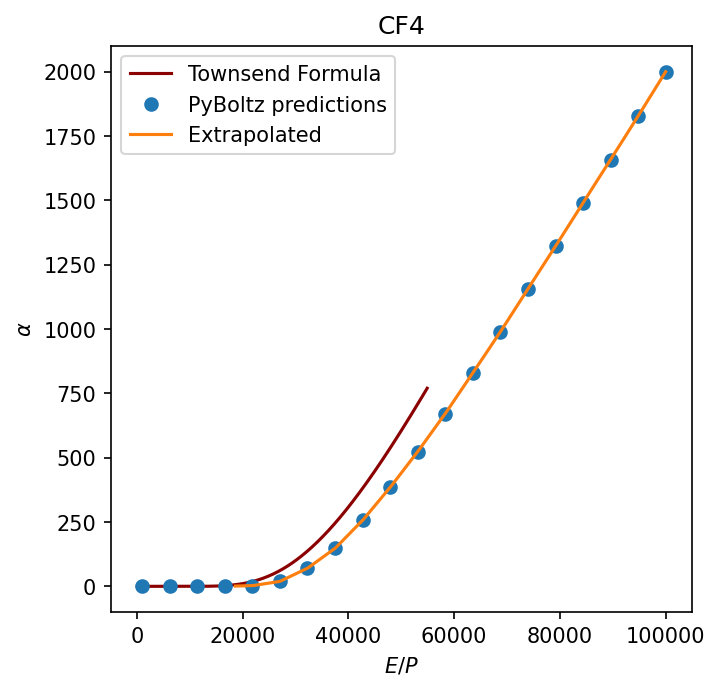

In [23]:
plt.figure(figsize=(5,5),dpi=150)
Erange=np.arange(100,55000,100)
CF4=pd.read_csv("./PyBoltzCF4_1bar.csv")


plt.plot(Erange, Aco*750*np.exp(-Bco*750/Erange),color='DarkRed',label='Townsend Formula')
alphafuncCF4=interpolate.interp1d(CF4.TownsendAlpha,CF4.EField/750,bounds_error=False,fill_value='extrapolate')

plt.plot(CF4.EField, CF4.TownsendAlpha,'o',label='PyBoltz predictions')

alphas=np.arange(0,2000,1)
plt.plot(alphafuncCF4(alphas)*750,alphas,label='Extrapolated')
plt.title("CF4")
plt.xlabel(r"$E/P$")
plt.ylabel(r"$\alpha$")
plt.legend(loc='upper left')

In [283]:
import pandas as pd

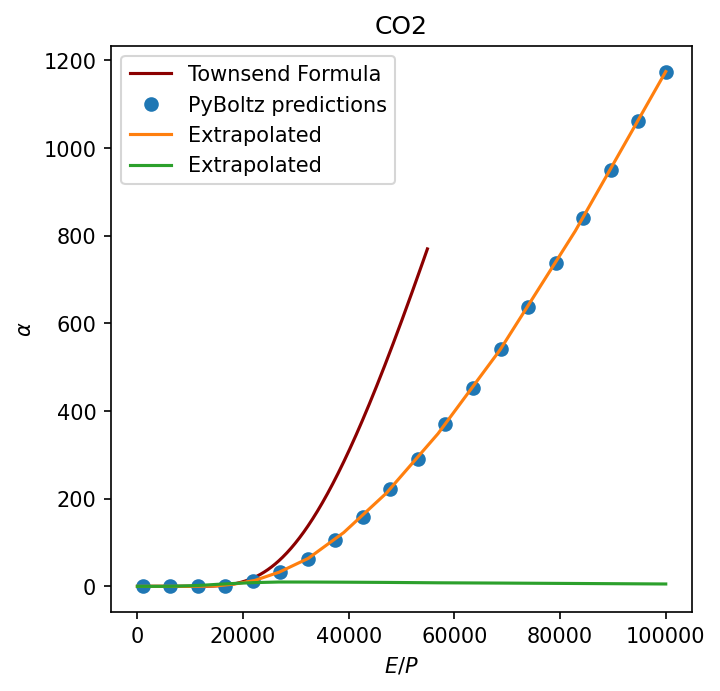

In [370]:
plt.figure(figsize=(5,5),dpi=150)
Erange=np.arange(100,55000,100)
CO2=pd.read_csv("./PyBoltzCO2_1bar.csv")
Es=np.logspace(1,5,50)
plt.plot(Erange, Aco*750*np.exp(-Bco*750/Erange),color='DarkRed',label='Townsend Formula')
alphafuncCO2=interpolate.interp1d(CO2.EField,CO2.TownsendAlpha,bounds_error=False,fill_value='extrapolate')
betafuncCO2=interpolate.interp1d(CO2.EField,CO2.Attachment,bounds_error=False,fill_value='extrapolate')

ToSolve = lambda V, pd: np.abs((alphafuncCO2(V/pd)-betafuncCO2(V/pd))*pd-np.log(1+(1-betafuncCO2(V/pd)/alphafuncCO2(V/pd))/gammase)+1)


# betafuncCO2=interpolate.interp1d(CO2.Attachment,CO2.EField/750,bounds_error=False,fill_value='extrapolate')

plt.plot(CO2.EField, CO2.TownsendAlpha,'o',label='PyBoltz predictions')

alphas=np.arange(0,1200,1)
betas=np.arange(0,10,1)
plt.plot(Es,alphafuncCO2(Es),label='Extrapolated')
plt.plot(Es,betafuncCO2(Es),label='Extrapolated')
# plt.plot(betafuncCO2(betas)*750,betas,label='Extrapolated - w/ attachment')
plt.title("CO2")
plt.xlabel(r"$E/P$")
plt.ylabel(r"$\alpha$")
plt.legend(loc='upper left')

In [433]:
def SolveItWithAttachment(pds,alpha,beta, gamma=0.01):
    Vs=np.logspace(2,5.5,5000)
    subfun = lambda x: np.maximum(0.01,alpha(x)-beta(x))
    Solves=np.abs(subfun(Vs/pds)-(np.log(1+subfun(Vs/pds)/(alpha(Vs/pds)*gamma))/pds))
    SolvesNoAtt=np.abs(alpha(Vs/pds)-(np.log(1+1./gamma))/pds)
    minv=np.argmin(Solves)
    minvNoAtt=np.argmin(SolvesNoAtt)
    return [Vs[minv],Vs[minvNoAtt]]

def SolveOverAllPoints(pdsr,alpha,beta, gamma=0.01):
    VsReturn=[]
    for pds in pdsr:
        VsReturn.append(SolveItWithAttachment(pds,alpha,beta, gamma))
    VsReturn=np.array(VsReturn)
    return VsReturn

<ipython-input-433-f5fcb3b5e7a0>:4: RuntimeWarning: divide by zero encountered in true_divide
  Solves=np.abs(subfun(Vs/pds)-(np.log(1+subfun(Vs/pds)/(alpha(Vs/pds)*gamma))/pds))


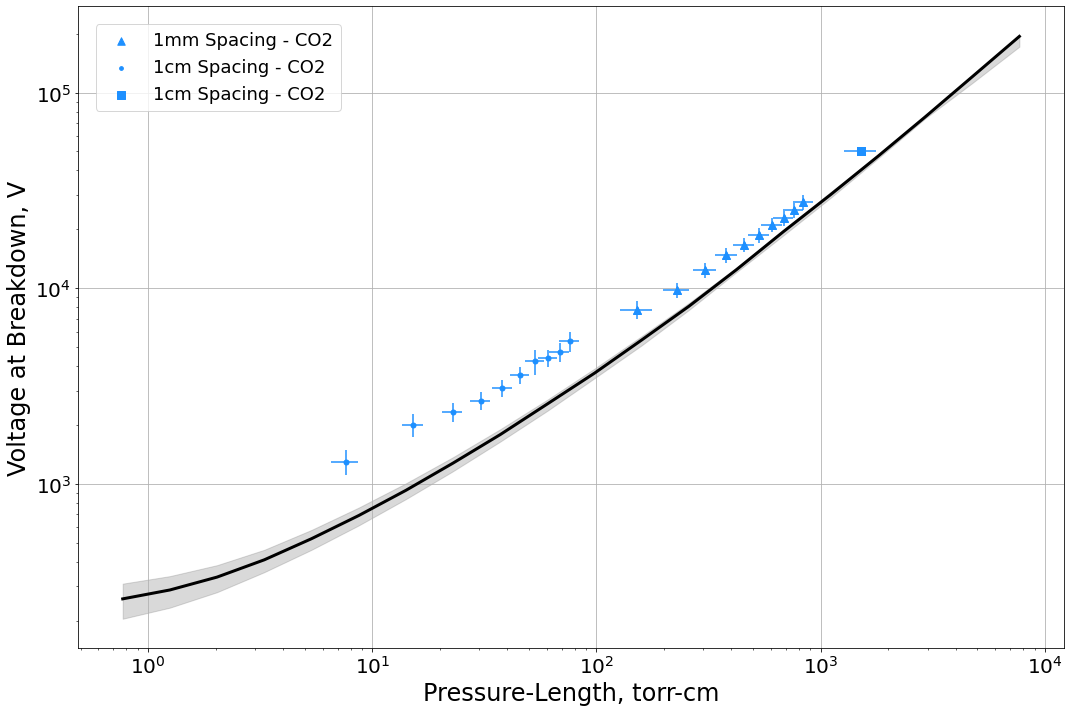

In [434]:
fig, ax = plt.subplots()

# CO2
plt.errorbar(dfp.loc[('CO2','1mm','GP','1'),'avep'],dfp.loc[('CO2','1mm','GP','1'),'avev'], xerr=dfp.loc[('CO2','1mm','GP','1'),'perr'], yerr=dfp.loc[('CO2','1mm','GP','1'),'verr'], ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(dfp.loc[('CO2','1mm','GP','1'),'avep'],dfp.loc[('CO2','1mm','GP','1'),'avev'],color='dodgerblue', marker='^', s=56, label='1mm Spacing - CO2')
plt.errorbar(dfp.loc[('CO2','1mm','AP','1'),'avep'],dfp.loc[('CO2','1mm','AP','1'),'avev'], xerr=dfp.loc[('CO2','1mm','AP','1'),'perr'], yerr=dfp.loc[('CO2','1mm','AP','1'),'verr'], ls='', color='dodgerblue', marker='.', ms=10)
plt.scatter(dfp.loc[('CO2','1mm','AP','1'),'avep'],dfp.loc[('CO2','1mm','AP','1'),'avev'],color='dodgerblue', marker='.', s=56, label='1cm Spacing - CO2')
plt.errorbar(dfp.loc[('CO2','10mm','GP','1'),'avep'],dfp.loc[('CO2','10mm','GP','1'),'avev'], xerr=dfp.loc[('CO2','10mm','GP','1'),'perr'], yerr=dfp.loc[('CO2','10mm','GP','1'),'perr'], ls='', color='dodgerblue', marker='s', ms=8)
plt.scatter(dfp.loc[('CO2','10mm','GP','1'),'avep'],dfp.loc[('CO2','10mm','GP','1'),'avev'],color='dodgerblue', marker='s', s=56, label='1cm Spacing - CO2')

#Vb4_CO2_1 = d*p*alphafuncCO2inv(770/(d*p)*np.log(1+1/.0033))
#Vb4_CO2_2 = d*p*alphafuncCO2inv(770/(d*p)*np.log(1+1/.033))

VsCO2_mid=SolveOverAllPoints(pdsr,alphafuncCO2,betafuncCO2, gamma=0.01)[:,0]
VsCO2_hi=SolveOverAllPoints(pdsr,alphafuncCO2,betafuncCO2, gamma=0.033)[:,0]
VsCO2_lo=SolveOverAllPoints(pdsr,alphafuncCO2,betafuncCO2, gamma=0.0033)[:,0]

ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.fill_between(p, Vb4_CO2_1, Vb4_CO2_2, color='black', alpha=.25, label='PyBoltz Paschen')
#plt.plot(pdsr*770, Vb4_CO2_mid, color='black')
plt.plot(pdsr*770, VsCO2_mid, '-',color='black',linewidth=3)
plt.fill_between(pdsr*770, VsCO2_lo, VsCO2_hi, color='dimgrey',alpha=0.25)
plt.grid()
plt.legend(fontsize=18, borderaxespad=1, loc="best")

plt.tight_layout()

plt.show()

/usr/local/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:605: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:608: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


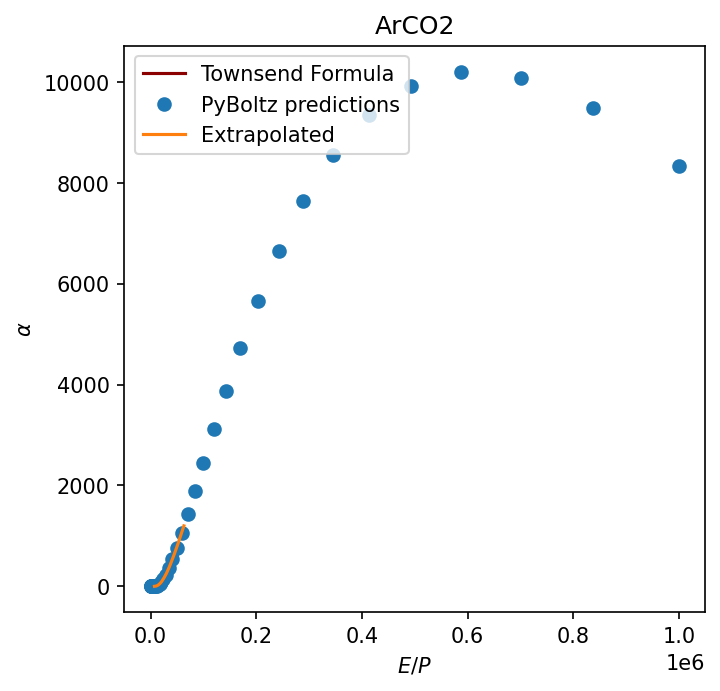

In [425]:
plt.figure(figsize=(5,5),dpi=150)
Erange=np.arange(100,55000,100)
ArCO2=pd.read_csv("./PyBoltz_ArCO2_1bar.csv")

plt.plot(Erange, Aco*750*np.exp(-Bco*750/Erange),color='DarkRed',label='Townsend Formula')
alphafuncArCO2=interpolate.interp1d(ArCO2.TownsendAlpha,ArCO2.EField/750,bounds_error=False,fill_value='extrapolate')

plt.plot(ArCO2.EField, ArCO2.TownsendAlpha,'o',label='PyBoltz predictions')

alphas=np.arange(0,1200,1)
betas=np.arange(0,10,1)
plt.plot(alphafuncArCO2(alphas)*750,alphas,label='Extrapolated')
plt.title("ArCO2")
plt.xlabel(r"$E/P$")
plt.ylabel(r"$\alpha$")
plt.legend(loc='upper left')

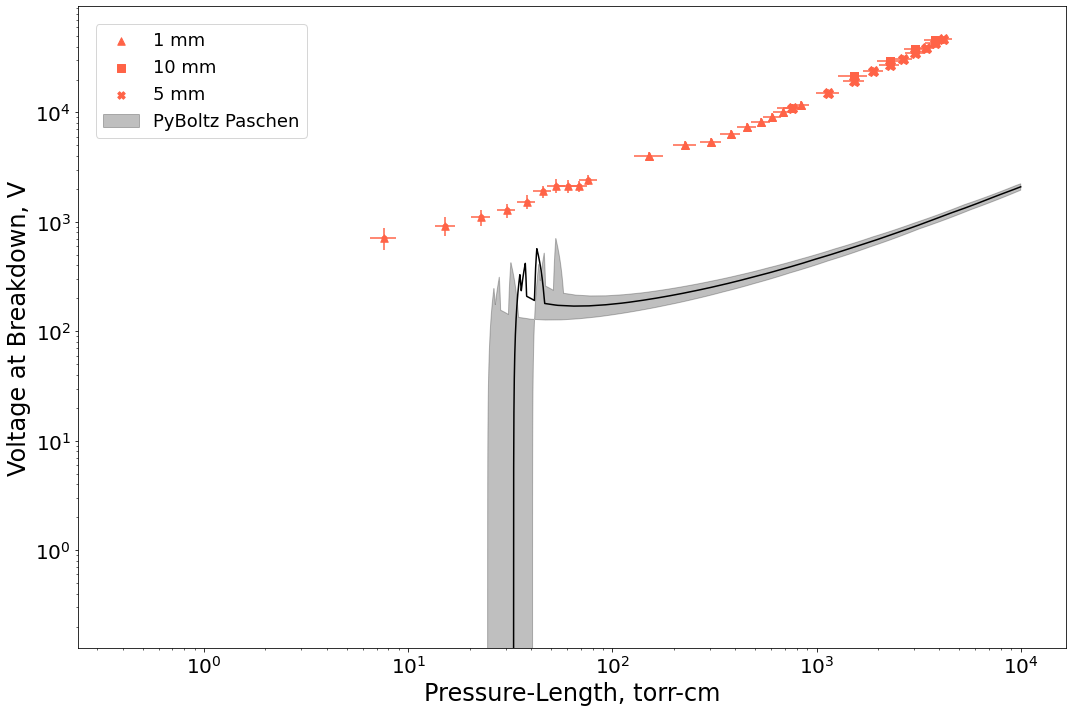

In [426]:
fig, ax = plt.subplots()

# Argon CO2
plt.errorbar(dfp.loc[('ArCO2','1mm','GP','1'), 'avep'],dfp.loc[('ArCO2','1mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCO2','1mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCO2','1mm','GP','1'), 'verr'], ls='', color='tomato', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCO2','1mm','GP','1'), 'avep'],dfp.loc[('ArCO2','1mm','GP','1'), 'avev'],color='tomato', marker='^', s=56, label='1 mm')
plt.errorbar(dfp.loc[('ArCO2','1mm','AP','1'), 'avep'],dfp.loc[('ArCO2','1mm','AP','1'), 'avev'], xerr=dfp.loc[('ArCO2','1mm','AP','1'), 'perr'], yerr=dfp.loc[('ArCO2','1mm','AP','1'), 'verr'], ls='', color='tomato', marker='.', ms=10)
plt.scatter(dfp.loc[('ArCO2','1mm','AP','1'), 'avep'],dfp.loc[('ArCO2','1mm','AP','1'), 'avev'],color='tomato', marker='^', s=56)
plt.errorbar(dfp.loc[('ArCO2','10mm','GP','1'), 'avep'],dfp.loc[('ArCO2','10mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCO2','10mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCO2','10mm','GP','1'), 'verr'], ls='', color='tomato', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCO2','10mm','GP','1'), 'avep'],dfp.loc[('ArCO2','10mm','GP','1'), 'avev'],color='tomato', marker='s', s=56, label='10 mm')
plt.errorbar(dfp.loc[('ArCO2','5mm','GP','1'), 'avep'],dfp.loc[('ArCO2','5mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCO2','5mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCO2','5mm','GP','1'), 'verr'], ls='', color='tomato', marker='X', ms=10)
plt.scatter(dfp.loc[('ArCO2','5mm','GP','1'), 'avep'],dfp.loc[('ArCO2','5mm','GP','1'), 'avev'],color='tomato', marker='X', s=56, label='5 mm')

Vb4_ArCO2_1 = d*p*alphafuncArCO2(770/(d*p)*np.log(1+1/.0033))
Vb4_ArCO2_2 = d*p*alphafuncArCO2(770/(d*p)*np.log(1+1/.033))
Vb4_ArCO2_mid = d*p*alphafuncArCO2(770/(d*p)*np.log(1+1/.01))


ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.fill_between(p, Vb4_ArCO2_1, Vb4_ArCO2_2, color='black', alpha=.25, label='PyBoltz Paschen')
plt.plot(p, Vb4_ArCO2_mid, color='black')

plt.legend(fontsize=18, borderaxespad=1, loc="best")

plt.tight_layout()

plt.show()

/usr/local/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:605: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:608: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


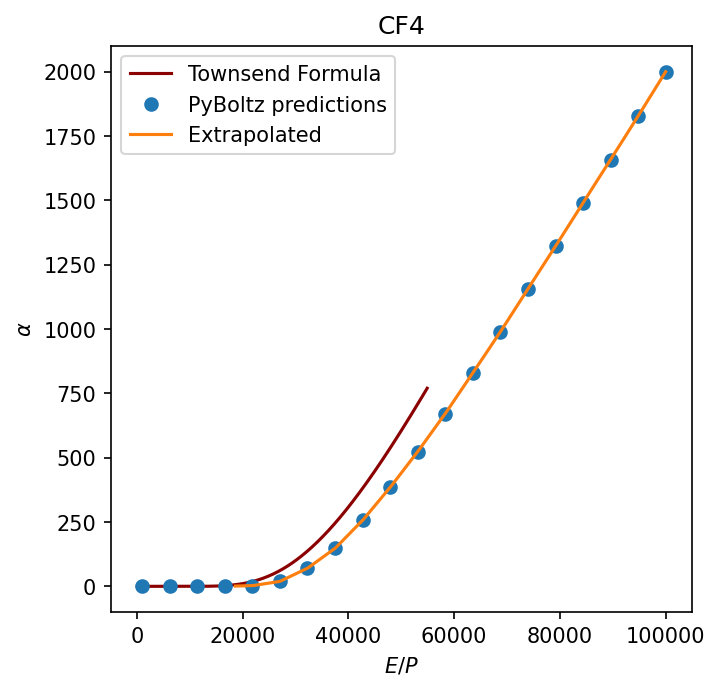

In [28]:
plt.figure(figsize=(5,5),dpi=150)
Erange=np.arange(100,55000,100)
CF4=pd.read_csv("./PyBoltzCF4_1bar.csv")

plt.plot(Erange, Aco*750*np.exp(-Bco*750/Erange),color='DarkRed',label='Townsend Formula')
alphafuncCF4=interpolate.interp1d(CF4.TownsendAlpha,CF4.EField/750,bounds_error=False,fill_value='extrapolate')

plt.plot(CF4.EField, CF4.TownsendAlpha,'o',label='PyBoltz predictions')

alphas=np.arange(0,2000,1)
plt.plot(alphafuncCF4(alphas)*750,alphas,label='Extrapolated')
plt.title("CF4")
plt.xlabel(r"$E/P$")
plt.ylabel(r"$\alpha$")
plt.legend(loc='upper left')

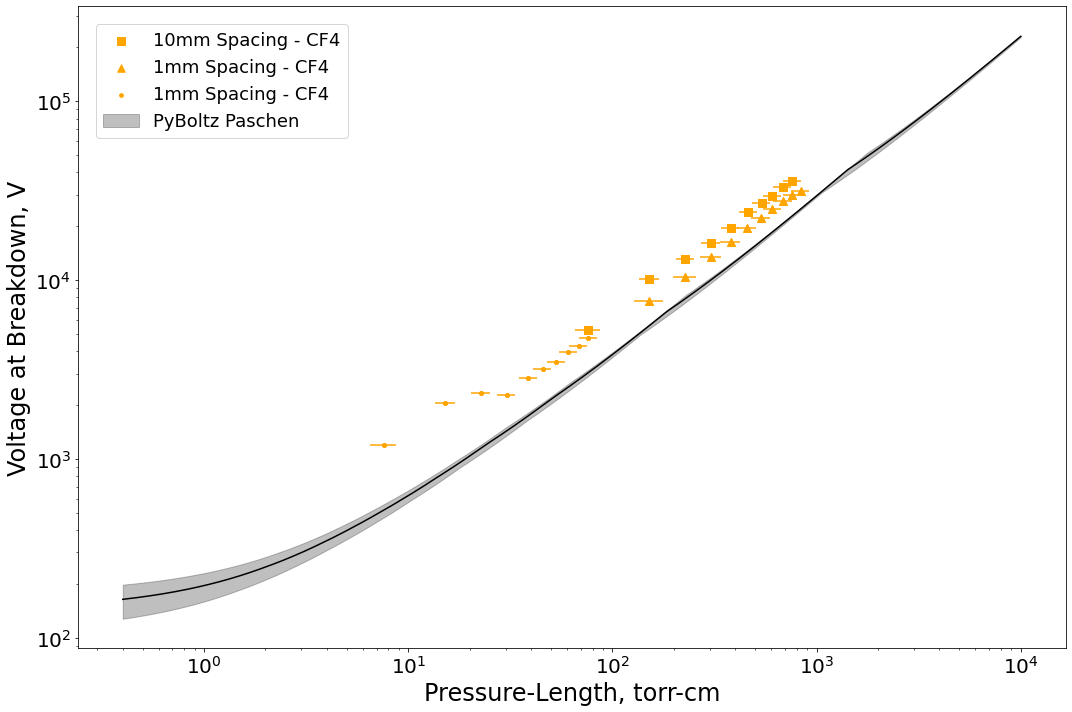

In [29]:
fig, ax = plt.subplots()

#CF4
plt.errorbar(dfp.loc[('CF4','10mm','AP','1'),'avep'],dfp.loc[('CF4','10mm','AP','1'),'avev'], xerr=dfp.loc[('CF4','10mm','AP','1'),'perr'], yerr=dfp.loc[('CF4','10mm','AP','1'),'perr'], ls='', color='orange', marker='s', ms=8)
plt.scatter(dfp.loc[('CF4','10mm','AP','1'),'avep'],dfp.loc[('CF4','10mm','AP','1'),'avev'],color='orange', marker='s', s=56, label='10mm Spacing - CF4')
plt.errorbar(dfp.loc[('CF4','1mm','GP','1'),'avep'],dfp.loc[('CF4','1mm','GP','1'),'avev'], xerr=dfp.loc[('CF4','1mm','GP','1'),'perr'], yerr=dfp.loc[('CF4','1mm','GP','1'),'perr'], ls='', color='orange', marker='^', ms=8)
plt.scatter(dfp.loc[('CF4','1mm','GP','1'),'avep'],dfp.loc[('CF4','1mm','GP','1'),'avev'],color='orange', marker='^', s=56, label='1mm Spacing - CF4')
plt.errorbar(dfp.loc[('CF4','1mm','AP','1'),'avep'],dfp.loc[('CF4','1mm','AP','1'),'avev'], xerr=dfp.loc[('CF4','1mm','AP','1'),'perr'], yerr=dfp.loc[('CF4','1mm','AP','1'),'perr'], ls='', color='orange', marker='.', ms=8)
plt.scatter(dfp.loc[('CF4','1mm','AP','1'),'avep'],dfp.loc[('CF4','1mm','AP','1'),'avev'],color='orange', marker='.', s=56, label='1mm Spacing - CF4')

Vb4_CF4_1 = d*p*alphafuncCF4(770/(d*p)*np.log(1+1/.0033))
Vb4_CF4_2 = d*p*alphafuncCF4(770/(d*p)*np.log(1+1/.033))
Vb4_CF4_mid = d*p*alphafuncCF4(770/(d*p)*np.log(1+1/.01))

ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.fill_between(p, Vb4_CF4_1, Vb4_CF4_2, color='black', alpha=.25, label='PyBoltz Paschen')
plt.plot(p, Vb4_CF4_mid, color='black')
# plt.plot(p, Vb4_CO2_1, label = 'w/o attachment')

plt.legend(fontsize=18, borderaxespad=1, loc="best")

plt.tight_layout()

plt.show()

/usr/local/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:605: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/usr/local/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:608: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


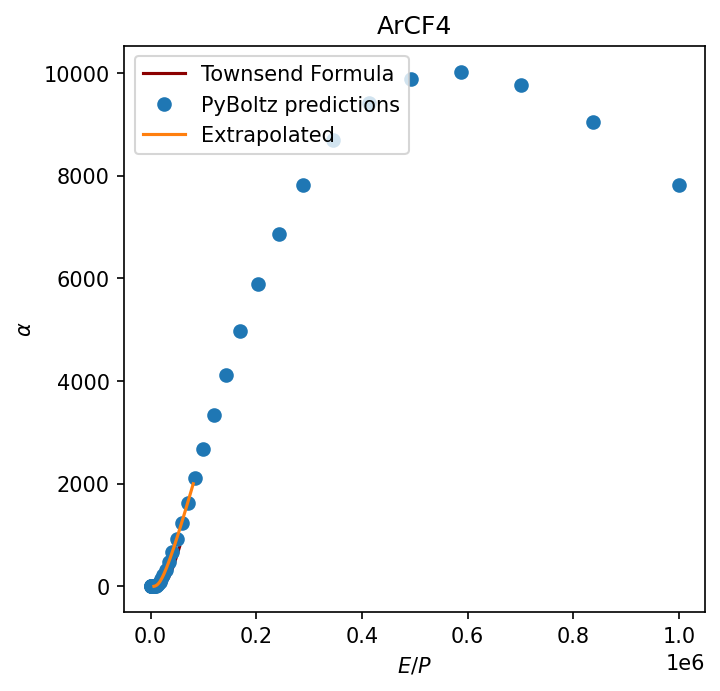

In [30]:
plt.figure(figsize=(5,5),dpi=150)
Erange=np.arange(100,55000,100)
ArCF4=pd.read_csv("./PyBoltz_ArCF4_1bar.csv")

plt.plot(Erange, Aco*750*np.exp(-Bco*750/Erange),color='DarkRed',label='Townsend Formula')
alphafuncArCF4=interpolate.interp1d(ArCF4.TownsendAlpha,ArCF4.EField/750,bounds_error=False,fill_value='extrapolate')

plt.plot(ArCF4.EField, ArCF4.TownsendAlpha,'o',label='PyBoltz predictions')

alphas=np.arange(0,2000,1)
plt.plot(alphafuncArCF4(alphas)*750,alphas,label='Extrapolated')
plt.title("ArCF4")
plt.xlabel(r"$E/P$")
plt.ylabel(r"$\alpha$")
plt.legend(loc='upper left')

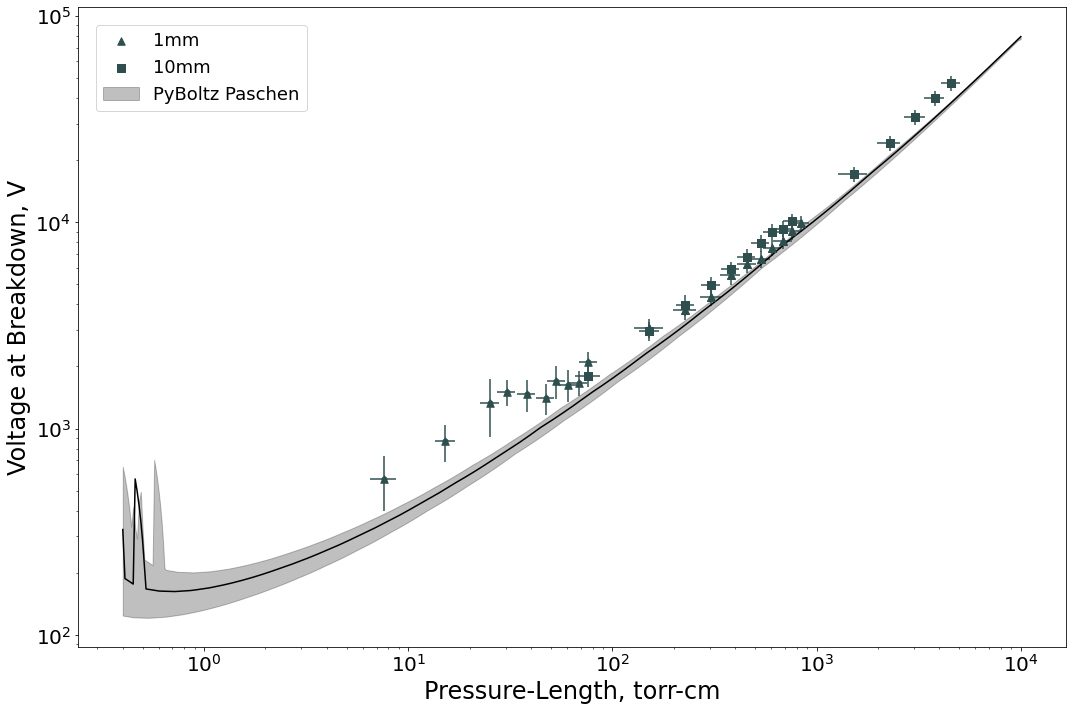

In [31]:
fig, ax = plt.subplots()

# ArCF4
plt.errorbar(dfp.loc[('ArCF4','1mm','GP','1'),'avep'],dfp.loc[('ArCF4','1mm','GP','1'),'avev'], xerr=dfp.loc[('ArCF4','1mm','GP','1'),'perr'], yerr=dfp.loc[('ArCF4','1mm','GP','1'),'verr'], ls='', color='darkslategrey', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCF4','1mm','GP','1'),'avep'],dfp.loc[('ArCF4','1mm','GP','1'),'avev'],color='darkslategrey', marker='^', s=56, label='1mm')
plt.errorbar(dfp.loc[('ArCF4','1mm','AP','1'),'avep'],dfp.loc[('ArCF4','1mm','AP','1'),'avev'], xerr=dfp.loc[('ArCF4','1mm','AP','1'),'perr'], yerr=dfp.loc[('ArCF4','1mm','AP','1'),'verr'], ls='', color='darkslategrey', marker='.', ms=10)
plt.scatter(dfp.loc[('ArCF4','1mm','AP','1'),'avep'],dfp.loc[('ArCF4','1mm','AP','1'),'avev'],color='darkslategrey', marker='^', s=56)
plt.errorbar(dfp.loc[('ArCF4','10mm','AP','1'),'avep'],dfp.loc[('ArCF4','10mm','AP','1'),'avev'], xerr=dfp.loc[('ArCF4','10mm','AP','1'),'perr'], yerr=dfp.loc[('ArCF4','10mm','AP','1'),'verr'], ls='', color='darkslategrey', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCF4','10mm','AP','1'),'avep'],dfp.loc[('ArCF4','10mm','AP','1'),'avev'],color='darkslategrey', marker='s', s=56, label='10mm')
plt.errorbar(dfp.loc[('ArCF4','10mm','GP','1'),'avep'],dfp.loc[('ArCF4','10mm','GP','1'),'avev'], xerr=dfp.loc[('ArCF4','10mm','GP','1'),'perr'], yerr=dfp.loc[('ArCF4','10mm','GP','1'),'verr'], ls='', color='darkslategrey', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCF4','10mm','GP','1'),'avep'],dfp.loc[('ArCF4','10mm','GP','1'),'avev'],color='darkslategrey', marker='s', s=56)

Vb4_ArCF4_1 = d*p*alphafuncArCF4(770/(d*p)*np.log(1+1/.0033))
Vb4_ArCF4_2 = d*p*alphafuncArCF4(770/(d*p)*np.log(1+1/.033))
Vb4_ArCF4_mid = d*p*alphafuncArCF4(770/(d*p)*np.log(1+1/.01))

ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.fill_between(p, Vb4_ArCF4_1, Vb4_ArCF4_2, color='black', alpha=.25, label='PyBoltz Paschen')
plt.plot(p, Vb4_ArCF4_mid, color='black')
# plt.plot(p, Vb4_CO2_1, label = 'w/o attachment')

plt.legend(fontsize=18, borderaxespad=1, loc="best")

plt.tight_layout()

plt.show()

In [32]:
plt.figure(figsize=(5,5),dpi=150)
Erange=np.arange(100,55000,100)
Xe=pd.read_csv("")

plt.plot(Erange, Aco*750*np.exp(-Bco*750/Erange),color='DarkRed',label='Townsend Formula')
alphafuncXe=interpolate.interp1d(Xe.TownsendAlpha,Xe.EField/750,bounds_error=False,fill_value='extrapolate')

plt.plot(Xe.EField, Xe.TownsendAlpha,'o',label='PyBoltz predictions')

alphas=np.arange(0,2000,1)
plt.plot(alphafuncXe(alphas)*750,alphas,label='Extrapolated')
plt.title("ArCF4")
plt.xlabel(r"$E/P$")
plt.ylabel(r"$\alpha$")
plt.legend(loc='upper left')

FileNotFoundError: [Errno 2] No such file or directory: ''

<Figure size 750x750 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()

# Xe
plt.errorbar(dfp.loc[('Xe','1mm','GP','1'),'avep'],dfp.loc[('Xe','1mm','GP','1'),'avev'], xerr=dfp.loc[('Xe','1mm','GP','1'),'perr'], yerr=dfp.loc[('Xe','1mm','GP','1'),'verr'], ls='', color='darkslategrey', marker='^', ms=8)
plt.scatter(dfp.loc[('Xe','1mm','GP','1'),'avep'],dfp.loc[('Xe','1mm','GP','1'),'avev'],color='darkslategrey', marker='^', s=56, label='1mm')
plt.errorbar(dfp.loc[('Xe','1mm','AP','1'),'avep'],dfp.loc[('Xe','1mm','AP','1'),'avev'], xerr=dfp.loc[('Xe','1mm','AP','1'),'perr'], yerr=dfp.loc[('Xe','1mm','AP','1'),'verr'], ls='', color='darkslategrey', marker='.', ms=10)
plt.scatter(dfp.loc[('Xe','1mm','AP','1'),'avep'],dfp.loc[('Xe','1mm','AP','1'),'avev'],color='darkslategrey', marker='^', s=56)
# plt.errorbar(dfp.loc[('Xe','10mm','AP','1'),'avep'],dfp.loc[('Xe','10mm','AP','1'),'avev'], xerr=dfp.loc[('Xe','10mm','AP','1'),'perr'], yerr=dfp.loc[('Xe','10mm','AP','1'),'verr'], ls='', color='darkslategrey', marker='s', ms=8)
# plt.scatter(dfp.loc[('Xe','10mm','AP','1'),'avep'],dfp.loc[('Xe','10mm','AP','1'),'avev'],color='darkslategrey', marker='s', s=56, label='10mm')
# plt.errorbar(dfp.loc[('Xe','10mm','GP','1'),'avep'],dfp.loc[('Xe','10mm','GP','1'),'avev'], xerr=dfp.loc[('Xe','10mm','GP','1'),'perr'], yerr=dfp.loc[('Xe','10mm','GP','1'),'verr'], ls='', color='darkslategrey', marker='s', ms=8)
# plt.scatter(dfp.loc[('Xe','10mm','GP','1'),'avep'],dfp.loc[('Xe','10mm','GP','1'),'avev'],color='darkslategrey', marker='s', s=56)

Vb4_Xe_1 = d*p*alphafuncXe(770/(d*p)*np.log(1+1/.0033))
Vb4_Xe_2 = d*p*alphafuncXe(770/(d*p)*np.log(1+1/.033))
Vb4_Xe_mid = d*p*alphafuncXe(770/(d*p)*np.log(1+1/.01))

ax.set_yscale('log')
ax.set_xscale('log')
fig.set_figheight(10)
fig.set_figwidth(15)

plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# plt.fill_between(p, Vb4_Xe_1, Vb4_Xe_2, color='black', alpha=.25, label='PyBoltz Paschen')
# plt.plot(p, Vb4_Xe_mid, color='black')

plt.legend(fontsize=18, borderaxespad=1, loc="best")

plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(321)
# Argon CO2
plt.errorbar(dfp.loc[('ArCO2','1mm','GP','1'), 'avep'],dfp.loc[('ArCO2','1mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCO2','1mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCO2','1mm','GP','1'), 'verr'], ls='', color='tomato', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCO2','1mm','GP','1'), 'avep'],dfp.loc[('ArCO2','1mm','GP','1'), 'avev'],color='tomato', marker='^', s=56, label='1 mm')
plt.errorbar(dfp.loc[('ArCO2','1mm','AP','1'), 'avep'],dfp.loc[('ArCO2','1mm','AP','1'), 'avev'], xerr=dfp.loc[('ArCO2','1mm','AP','1'), 'perr'], yerr=dfp.loc[('ArCO2','1mm','AP','1'), 'verr'], ls='', color='tomato', marker='.', ms=10)
plt.scatter(dfp.loc[('ArCO2','1mm','AP','1'), 'avep'],dfp.loc[('ArCO2','1mm','AP','1'), 'avev'],color='tomato', marker='^', s=56)
plt.errorbar(dfp.loc[('ArCO2','10mm','GP','1'), 'avep'],dfp.loc[('ArCO2','10mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCO2','10mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCO2','10mm','GP','1'), 'verr'], ls='', color='tomato', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCO2','10mm','GP','1'), 'avep'],dfp.loc[('ArCO2','10mm','GP','1'), 'avev'],color='tomato', marker='s', s=56, label='10 mm')
plt.errorbar(dfp.loc[('ArCO2','5mm','GP','1'), 'avep'],dfp.loc[('ArCO2','5mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCO2','5mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCO2','5mm','GP','1'), 'verr'], ls='', color='tomato', marker='X', ms=10)
plt.scatter(dfp.loc[('ArCO2','5mm','GP','1'), 'avep'],dfp.loc[('ArCO2','5mm','GP','1'), 'avev'],color='tomato', marker='X', s=56, label='5 mm')

plt.fill_between(p, Vb4_ArCO2_1, Vb4_ArCO2_2, color='black', alpha=.25, label = 'PyBoltz Best Fit')
plt.plot(p, Vb4_ArCO2_mid, color='black')

plt.xscale('log')
plt.yscale('log')

plt.title('Ar/CO2 (90%/10%)', fontsize=24)
plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, borderaxespad=1, loc="best")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1, 1.5*10**4)
plt.ylim(100, 1.5*10**5)
plt.grid()

plt.tight_layout(h_pad=2)

plt.subplot(322)
# CO2
plt.errorbar(dfp.loc[('CO2','1mm','GP','1'),'avep'],dfp.loc[('CO2','1mm','GP','1'),'avev'], xerr=dfp.loc[('CO2','1mm','GP','1'),'perr'], yerr=dfp.loc[('CO2','1mm','GP','1'),'verr'], ls='', color='dodgerblue', marker='^', ms=8)
plt.scatter(dfp.loc[('CO2','1mm','GP','1'),'avep'],dfp.loc[('CO2','1mm','GP','1'),'avev'],color='dodgerblue', marker='^', s=56, label='1 mm')
plt.errorbar(dfp.loc[('CO2','1mm','AP','1'),'avep'],dfp.loc[('CO2','1mm','AP','1'),'avev'], xerr=dfp.loc[('CO2','1mm','AP','1'),'perr'], yerr=dfp.loc[('CO2','1mm','AP','1'),'verr'], ls='', color='dodgerblue', marker='.', ms=10)
plt.scatter(dfp.loc[('CO2','1mm','AP','1'),'avep'],dfp.loc[('CO2','1mm','AP','1'),'avev'],color='dodgerblue', marker='^', s=56)
plt.errorbar(dfp.loc[('CO2','10mm','GP','1'),'avep'],dfp.loc[('CO2','10mm','GP','1'),'avev'], xerr=dfp.loc[('CO2','10mm','GP','1'),'perr'], yerr=dfp.loc[('CO2','10mm','GP','1'),'perr'], ls='', color='dodgerblue', marker='s', ms=8)
plt.scatter(dfp.loc[('CO2','10mm','GP','1'),'avep'],dfp.loc[('CO2','10mm','GP','1'),'avev'],color='dodgerblue', marker='s', s=56, label='10 mm')

plt.fill_between(p, Vb4_CO2_1, Vb4_CO2_2, color='black', alpha=.25, label = 'PyBoltz Best Fit')
plt.plot(p, Vb4_CO2_mid, color='black')

plt.xscale('log')
plt.yscale('log')

plt.title('CO2', fontsize=24)
plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, borderaxespad=1, loc="best")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1, 1.5*10**4)
plt.ylim(100, 1.5*10**5)
plt.grid()

plt.tight_layout()

plt.subplot(323)

# Argon CH4
# plt.errorbar(dfp.loc[('ArCH4','1mm','GP','1'), 'avep'],dfp.loc[('ArCH4','1mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','GP','1'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
# plt.scatter(dfp.loc[('ArCH4','1mm','GP','1'), 'avep'],dfp.loc[('ArCH4','1mm','GP','1'), 'avev'],color='limegreen', marker='^', s=56, label='1mm Spacing - ArCH4 - 1')
# plt.errorbar(dfp.loc[('ArCH4','1mm','GP','2'), 'avep'],dfp.loc[('ArCH4','1mm','GP','2'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','GP','2'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','GP','2'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
# plt.scatter(dfp.loc[('ArCH4','1mm','GP','2'), 'avep'],dfp.loc[('ArCH4','1mm','GP','2'), 'avev'],color='limegreen', marker='^', s=56, label='1mm Spacing - ArCH4 - 2')
# plt.errorbar(dfp.loc[('ArCH4','1mm','GP','3'), 'avep'],dfp.loc[('ArCH4','1mm','GP','3'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','GP','3'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','GP','3'), 'verr'], ls='', color='limegreen', marker='^', ms=8)
# plt.scatter(dfp.loc[('ArCH4','1mm','GP','3'), 'avep'],dfp.loc[('ArCH4','1mm','GP','3'), 'avev'],color='limegreen', marker='^', s=56, label='1mm Spacing - ArCH4 - 3')
plt.errorbar(dfp.loc[('ArCH4','1mm','AP','1'), 'avep'],dfp.loc[('ArCH4','1mm','AP','1'), 'avev'], xerr=dfp.loc[('ArCH4','1mm','AP','1'), 'perr'], yerr=dfp.loc[('ArCH4','1mm','AP','1'), 'verr'], ls='', color='limegreen', marker='.', ms=10)
plt.scatter(dfp.loc[('ArCH4','1mm','AP','1'), 'avep'],dfp.loc[('ArCH4','1mm','AP','1'), 'avev'],color='limegreen', marker='^', s=56, label='1 mm')
plt.errorbar(dfp.loc[('ArCH4','10mm','GP','1'), 'avep'],dfp.loc[('ArCH4','10mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','10mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','10mm','GP','1'), 'verr'], ls='', color='limegreen', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCH4','10mm','GP','1'), 'avep'],dfp.loc[('ArCH4','10mm','GP','1'), 'avev'],color='limegreen', marker='s', s=56, label='10 mm')
plt.errorbar(dfp.loc[('ArCH4','10mm','GP','2'), 'avep'],dfp.loc[('ArCH4','10mm','GP','2'), 'avev'], xerr=dfp.loc[('ArCH4','10mm','GP','2'), 'perr'], yerr=dfp.loc[('ArCH4','10mm','GP','2'), 'verr'], ls='', color='limegreen', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCH4','10mm','GP','2'), 'avep'],dfp.loc[('ArCH4','10mm','GP','2'), 'avev'],color='limegreen', marker='s', s=56)
plt.errorbar(dfp.loc[('ArCH4','10mm','AP','1'), 'avep'],dfp.loc[('ArCH4','10mm','AP','1'), 'avev'], xerr=dfp.loc[('ArCH4','10mm','AP','1'), 'perr'], yerr=dfp.loc[('ArCH4','10mm','AP','1'), 'verr'], ls='', color='limegreen', marker='s', ms=10)
plt.scatter(dfp.loc[('ArCH4','10mm','AP','1'), 'avep'],dfp.loc[('ArCH4','10mm','AP','1'), 'avev'],color='limegreen', marker='s', s=56)
plt.errorbar(dfp.loc[('ArCH4','5mm','GP','1'), 'avep'],dfp.loc[('ArCH4','5mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','5mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','5mm','GP','1'), 'verr'], ls='', color='limegreen', marker='X', ms=8)
plt.scatter(dfp.loc[('ArCH4','5mm','GP','1'), 'avep'],dfp.loc[('ArCH4','5mm','GP','1'), 'avev'],color='limegreen', marker='X', s=56, label='5 mm')
# plt.errorbar(dfp.loc[('ArCH4','0.1mm','GP','1'), 'avep'],dfp.loc[('ArCH4','0.1mm','GP','1'), 'avev'], xerr=dfp.loc[('ArCH4','0.1mm','GP','1'), 'perr'], yerr=dfp.loc[('ArCH4','0.1mm','GP','1'), 'verr'], ls='', color='limegreen', marker='X', ms=8)
# plt.scatter(dfp.loc[('ArCH4','0.1mm','GP','1'), 'avep'],dfp.loc[('ArCH4','0.1mm','GP','1'), 'avev'],color='limegreen', marker='X', s=56, label='0.1mm Spacing - ArCH4')

plt.fill_between(p, Vb4_ArCH4_1, Vb4_ArCH4_2, color='black', alpha=.25, label = 'PyBoltz Best Fit')
plt.plot(p, Vb4_ArCH4_mid, color='black')

plt.xscale('log')
plt.yscale('log')

plt.title('Ar/CH4 (90%/10%)', fontsize=24)
plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, borderaxespad=1, loc="best")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1, 1.5*10**4)
plt.ylim(100, 1.5*10**5)
plt.grid()

plt.tight_layout()

plt.subplot(324)
# Argon
plt.errorbar(dfp.loc[('Ar','1mm','GP','1'),'avep'],dfp.loc[('Ar','1mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','1mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','1mm','GP','1'),'verr'], ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(dfp.loc[('Ar','1mm','GP','1'),'avep'],dfp.loc[('Ar','1mm','GP','1'),'avev'],color='blueviolet', marker='^', s=56, label='1 mm')
plt.errorbar(dfp.loc[('Ar','1mm','GP','2'),'avep'],dfp.loc[('Ar','1mm','GP','2'),'avev'], xerr=dfp.loc[('Ar','1mm','GP','2'),'perr'], yerr=dfp.loc[('Ar','1mm','GP','2'),'verr'], ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(dfp.loc[('Ar','1mm','GP','2'),'avep'],dfp.loc[('Ar','1mm','GP','2'),'avev'],color='blueviolet', marker='^', s=56)
plt.errorbar(dfp.loc[('Ar','1mm','GP','3'),'avep'],dfp.loc[('Ar','1mm','GP','3'),'avev'], xerr=dfp.loc[('Ar','1mm','GP','3'),'perr'], yerr=dfp.loc[('Ar','1mm','GP','3'),'verr'], ls='', color='blueviolet', marker='^', ms=8)
plt.scatter(dfp.loc[('Ar','1mm','GP','3'),'avep'],dfp.loc[('Ar','1mm','GP','3'),'avev'],color='blueviolet', marker='^', s=56)
plt.errorbar(dfp.loc[('Ar','1mm','AP','1'),'avep'],dfp.loc[('Ar','1mm','AP','1'),'avev'], xerr=dfp.loc[('Ar','1mm','AP','1'),'perr'], yerr=dfp.loc[('Ar','1mm','AP','1'),'verr'], ls='', color='blueviolet', marker='.', ms=10)
plt.scatter(dfp.loc[('Ar','1mm','AP','1'),'avep'],dfp.loc[('Ar','1mm','AP','1'),'avev'],color='blueviolet', marker='^', s=56)
plt.errorbar(dfp.loc[('Ar','10mm','GP','1'),'avep'],dfp.loc[('Ar','10mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','10mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','10mm','GP','1'),'verr'], ls='', color='blueviolet', marker='s', ms=8)
plt.scatter(dfp.loc[('Ar','10mm','GP','1'),'avep'],dfp.loc[('Ar','10mm','GP','1'),'avev'],color='blueviolet', marker='s', s=56, label='10 mm')
plt.errorbar(dfp.loc[('Ar','5mm','GP','1'),'avep'],dfp.loc[('Ar','5mm','GP','1'),'avev'], xerr=dfp.loc[('Ar','5mm','GP','1'),'perr'], yerr=dfp.loc[('Ar','5mm','GP','1'),'verr'], ls='', color='blueviolet', marker='X', ms=10)
plt.scatter(dfp.loc[('Ar','5mm','GP','1'),'avep'],dfp.loc[('Ar','5mm','GP','1'),'avev'],color='blueviolet', marker='X', s=56, label='5 mm')
plt.errorbar(dfp.loc[('Ar','5mm','GP','2'),'avep'],dfp.loc[('Ar','5mm','GP','2'),'avev'], xerr=dfp.loc[('Ar','5mm','GP','2'),'perr'], yerr=dfp.loc[('Ar','5mm','GP','2'),'verr'], ls='', color='blueviolet', marker='X', ms=10)
plt.scatter(dfp.loc[('Ar','5mm','GP','2'),'avep'],dfp.loc[('Ar','5mm','GP','2'),'avev'],color='blueviolet', marker='X', s=56)

plt.fill_between(p, Vb4_Ar_1, Vb4_Ar_2, color='black', alpha=.25, label = 'PyBoltz Best Fit')
plt.plot(p, Vb4_Ar_mid, color='black')

plt.xscale('log')
plt.yscale('log')

plt.title('Ar', fontsize=24)
plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, borderaxespad=1, loc="best")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1, 1.5*10**4)
plt.ylim(100, 1.5*10**5)
plt.grid()

plt.tight_layout()

plt.subplot(325)
# CF4
plt.errorbar(dfp.loc[('CF4','10mm','AP','1'),'avep'],dfp.loc[('CF4','10mm','AP','1'),'avev'], xerr=dfp.loc[('CF4','10mm','AP','1'),'perr'], yerr=dfp.loc[('CF4','10mm','AP','1'),'verr'], ls='', color='orange', marker='s', ms=8)
plt.scatter(dfp.loc[('CF4','10mm','AP','1'),'avep'],dfp.loc[('CF4','10mm','AP','1'),'avev'],color='orange', marker='s', s=56, label='10 mm')
plt.errorbar(dfp.loc[('CF4','10mm','AP','2'),'avep'],dfp.loc[('CF4','10mm','AP','2'),'avev'], xerr=dfp.loc[('CF4','10mm','AP','1'),'perr'], yerr=dfp.loc[('CF4','10mm','AP','2'),'verr'], ls='', color='orange', marker='s', ms=8)
plt.scatter(dfp.loc[('CF4','10mm','AP','2'),'avep'],dfp.loc[('CF4','10mm','AP','2'),'avev'],color='orange', marker='s', s=56)
plt.errorbar(dfp.loc[('CF4','1mm','GP','1'),'avep'],dfp.loc[('CF4','1mm','GP','1'),'avev'], xerr=dfp.loc[('CF4','1mm','GP','1'),'perr'], yerr=dfp.loc[('CF4','1mm','GP','1'),'verr'], ls='', color='orange', marker='^', ms=8)
plt.scatter(dfp.loc[('CF4','1mm','GP','1'),'avep'],dfp.loc[('CF4','1mm','GP','1'),'avev'],color='orange', marker='^', s=56, label='1 mm')
plt.errorbar(dfp.loc[('CF4','1mm','AP','1'),'avep'],dfp.loc[('CF4','1mm','AP','1'),'avev'], xerr=dfp.loc[('CF4','1mm','AP','1'),'perr'], yerr=dfp.loc[('CF4','1mm','AP','1'),'verr'], ls='', color='orange', marker='.', ms=10)
plt.scatter(dfp.loc[('CF4','1mm','AP','1'),'avep'],dfp.loc[('CF4','1mm','AP','1'),'avev'],color='orange', marker='^', s=56)

plt.fill_between(p, Vb4_CF4_1, Vb4_CF4_2, color='black', alpha=.25, label = 'PyBoltz Best Fit')
plt.plot(p, Vb4_CF4_mid, color='black')

plt.xscale('log')
plt.yscale('log')

plt.title('CF4', fontsize=24)
plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, borderaxespad=1, loc="best")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1, 1.5*10**4)
plt.ylim(100, 1.5*10**5)
plt.grid()

plt.tight_layout()

plt.subplot(326)
# ArCF4
plt.errorbar(dfp.loc[('ArCF4','1mm','GP','1'),'avep'],dfp.loc[('ArCF4','1mm','GP','1'),'avev'], xerr=dfp.loc[('ArCF4','1mm','GP','1'),'perr'], yerr=dfp.loc[('ArCF4','1mm','GP','1'),'verr'], ls='', color='darkslategrey', marker='^', ms=8)
plt.scatter(dfp.loc[('ArCF4','1mm','GP','1'),'avep'],dfp.loc[('ArCF4','1mm','GP','1'),'avev'],color='darkslategrey', marker='^', s=56, label='1mm')
plt.errorbar(dfp.loc[('ArCF4','1mm','AP','1'),'avep'],dfp.loc[('ArCF4','1mm','AP','1'),'avev'], xerr=dfp.loc[('ArCF4','1mm','AP','1'),'perr'], yerr=dfp.loc[('ArCF4','1mm','AP','1'),'verr'], ls='', color='darkslategrey', marker='.', ms=10)
plt.scatter(dfp.loc[('ArCF4','1mm','AP','1'),'avep'],dfp.loc[('ArCF4','1mm','AP','1'),'avev'],color='darkslategrey', marker='^', s=56)
plt.errorbar(dfp.loc[('ArCF4','10mm','AP','1'),'avep'],dfp.loc[('ArCF4','10mm','AP','1'),'avev'], xerr=dfp.loc[('ArCF4','10mm','AP','1'),'perr'], yerr=dfp.loc[('ArCF4','10mm','AP','1'),'verr'], ls='', color='darkslategrey', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCF4','10mm','AP','1'),'avep'],dfp.loc[('ArCF4','10mm','AP','1'),'avev'],color='darkslategrey', marker='s', s=56, label='10mm')
plt.errorbar(dfp.loc[('ArCF4','10mm','GP','1'),'avep'],dfp.loc[('ArCF4','10mm','GP','1'),'avev'], xerr=dfp.loc[('ArCF4','10mm','GP','1'),'perr'], yerr=dfp.loc[('ArCF4','10mm','GP','1'),'verr'], ls='', color='darkslategrey', marker='s', ms=8)
plt.scatter(dfp.loc[('ArCF4','10mm','GP','1'),'avep'],dfp.loc[('ArCF4','10mm','GP','1'),'avev'],color='darkslategrey', marker='s', s=56)

plt.fill_between(p, Vb4_ArCF4_1, Vb4_ArCF4_2, color='black', alpha=.25, label = 'PyBoltz Best Fit')
plt.plot(p, Vb4_ArCF4_mid, color='black')

plt.xscale('log')
plt.yscale('log')

plt.title('Ar/CF4 (99%/1%)', fontsize=24)
plt.xlabel('Pressure-Length, torr-cm', fontsize=24)
plt.ylabel('Voltage at Breakdown, V', fontsize=24)
plt.legend(fontsize=18, borderaxespad=1, loc="best")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(1, 1.5*10**4)
plt.ylim(100, 1.5*10**5)
plt.grid()

plt.tight_layout(h_pad=2,w_pad=2)
plt.savefig('panelplot.png', dpi=400)

plt.show()
